# Trabajo Practico "Introducción a la Ciencia de Datos"

# Instalaciones e Importacion de librerias

In [1]:
pip install anaconda

  Preparing metadata (setup.py) ... done
  Created wheel for anaconda: filename=anaconda-0.0.1.1-py3-none-any.whl size=1093 sha256=4170ffdd055c74d8c9e3986d8a8ee98f96fe019a2acbb366589d495f55421f99
  Stored in directory: /root/.cache/pip/wheels/4f/6e/40/8172063c425c01477a87d8d87e2d9afc7e52790aeea0ed5f33
Successfully built anaconda


In [2]:
pip install gdown

In [3]:
pip install researchpy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import researchpy as rp
import folium
from folium.plugins import HeatMap


Importar el CSV

In [5]:
#CARGA DEL CSV

file_id = '1sg6zacRkARbHruaC6GMUgUSNed1-f6ub'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'archivo.csv', quiet=False)




Downloading...
From: https://drive.google.com/uc?id=1sg6zacRkARbHruaC6GMUgUSNed1-f6ub
To: /content/archivo.csv
100%|██████████| 8.38M/8.38M [00:00<00:00, 37.1MB/s]


'archivo.csv'

In [6]:
dataset = pd.read_csv('archivo.csv', dtype={12: str, 42: str, 156: str, 169: str, 244: str, 293: str, 298: str, 385: str, 545: str})
df = pd.DataFrame(dataset)
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Columns: 548 entries, id to soc20
dtypes: float64(314), int64(68), object(166)
memory usage: 14.1+ MB


In [8]:
df.columns.get_loc('tv1')

12

In [9]:

fq_tv1=df['tv1'].value_counts()
tb_fq_tv1 = pd.DataFrame({'Valor': fq_tv1.index , 'Frecuencia': fq_tv1.values})
print(tb_fq_tv1)

  Valor  Frecuencia
0    SI        3033
1    NO         347


In [10]:
df.isnull().sum()

,0
id,0
region,0
localidad,0
provincia,0
genero,0
...,...
soc17.1,0
soc17.2,0
soc18,0
soc19,0


In [11]:
variable_musica=df['musica10'].value_counts()
print(variable_musica)
valores_anomalos_reemplazar=['-999999999','99']
nuevo_valor=['Ns Nc','Ns Nc']
df['musica10']=df['musica10'].replace(valores_anomalos_reemplazar,nuevo_valor)
variable_musica=df['musica10'].value_counts()
print(variable_musica)

musica10
No le gusta/ no le interesa                      736
Motivos económicos                               588
Falta de tiempo                                  399
Problemas de salud                               162
Tiene que cuidar hijos/ familiares               139
No hay ninguno cerca                             124
Miedo al contagio                                 82
Ns Nc                                             44
No asiste por ser menor de edad/ no lo dejan      14
No le gusta la oferta de recitales                13
No se dió/ no quiso                               10
No asiste por ser adulto mayor                    10
Porque no consiguio entradas/ se enteró tarde      9
No sale                                            8
No tiene con quien ir                              6
Inseguridad                                        5
Situación personal                                 5
99                                                 3
Otra                                 

# Caracteristicas del DATASET

##Cantidad de Id

In [12]:
cantidad_id = df['id'].count()
cantidad_unicos_id = df['id'].nunique()
tabla_cantidad = pd.DataFrame({
    'Columna': [df['id'].name],
    'Cantidad_id': [cantidad_id],
    'Cantidad_Unicos': [cantidad_unicos_id]

})

print(tabla_cantidad)

  Columna  Cantidad_id  Cantidad_Unicos
0      id         3380             3380


Hay 3380 registros unicos en el Dataset seleccionado

##Region

In [13]:
fq_region=df['region'].value_counts()
tb_fq_region = pd.DataFrame({'Valor': fq_region.index , 'Frecuencia': fq_region.values})
print(tb_fq_region)

       Valor  Frecuencia
0        GBA         620
1     CENTRO         608
2        NEA         448
3        NOA         446
4  PATAGONIA         439
5       CUYO         431
6       CABA         388


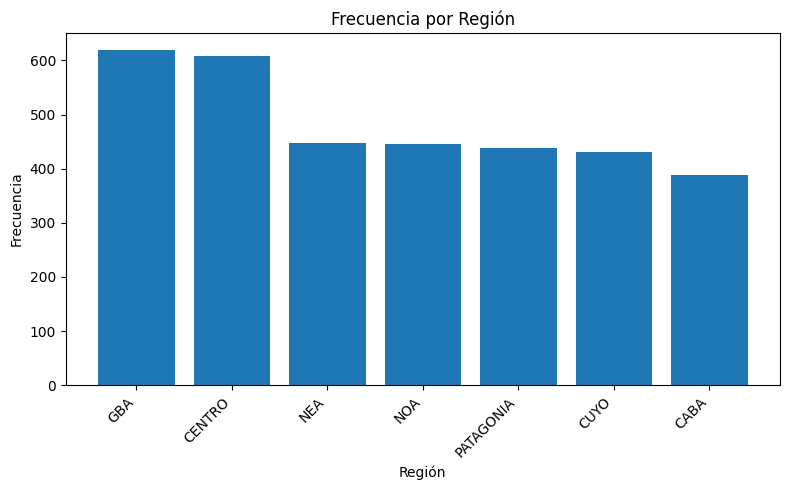

In [14]:
plt.figure(figsize=(8,5))  # Ajusta el tamaño si es necesario
plt.bar(tb_fq_region['Valor'], tb_fq_region['Frecuencia'])
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por Región')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta el espaciado para evitar que las etiquetas se superpongan
plt.show()

In [15]:
import folium
from folium.plugins import HeatMap
import pandas as pd # Assuming tb_fq_region is a pandas DataFrame

region_coordenadas = {
    'GBA': [-34.7000, -58.4000],
    'CABA': [-34.6037, -58.3816],
    'CENTRO': [-31.4167, -63.0000],
    'NEA': [-27.4500, -58.9867],
    'NOA': [-24.7821, -65.4232],
    'PATAGONIA': [-42.0000, -68.0000],
    'CUYO': [-32.8908, -68.8272]
}


data = {'Valor': ['GBA', 'CABA', 'CENTRO', 'NEA', 'NOA', 'PATAGONIA', 'CUYO'],
        'Frecuencia': [10, 15, 8, 5, 12, 7, 9]}
tb_fq_region = pd.DataFrame(data)
# ---------------------------------------------------------------

# Mapa base
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Lista de puntos [lat, lon, frecuencia] para HeatMap
heat_data = []

for i, row in tb_fq_region.iterrows():
    region = row['Valor']
    frecuencia = row['Frecuencia']
    if region in region_coordenadas:
        lat, lon = region_coordenadas[region]
        heat_data.append([lat, lon, frecuencia])

# Agregar HeatMap
HeatMap(
    heat_data,
    radius=50,   # Aumenta el tamaño de influencia de cada punto
    blur=70,     # Aumenta el difuminado
    max_zoom=6   # Opcional: controla el nivel de zoom donde se aplica el heatmap
).add_to(m)


for region, coords in region_coordenadas.items():
    lat, lon = coords
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(html=f"<div style='font-size: 10pt; font-weight: bold;'>{region}</div>"),
        tooltip=region
    ).add_to(m)

m

##Provincia

In [16]:
fq_provincia=df['provincia'].value_counts()
tb_fq_provincia = pd.DataFrame({'Valor': fq_provincia.index , 'Frecuencia': fq_provincia.values})
print(tb_fq_provincia)

                              Valor  Frecuencia
0                      Buenos Aires         813
1   Ciudad Autónoma de Buenos Aires         388
2                           Mendoza         256
3                           Córdoba         185
4                          Santa Fe         168
5                           Neuquén         149
6                           Tucumán         141
7                             Chaco         131
8                        Corrientes         130
9                          Misiones         122
10                         San Juan         113
11                           Chubut         103
12                            Jujuy          99
13                            Salta          87
14                         La Pampa          75
15                        Río Negro          71
16                          Formosa          65
17                         San Luis          62
18                       Entre Ríos          60
19              Santiago del Estero     

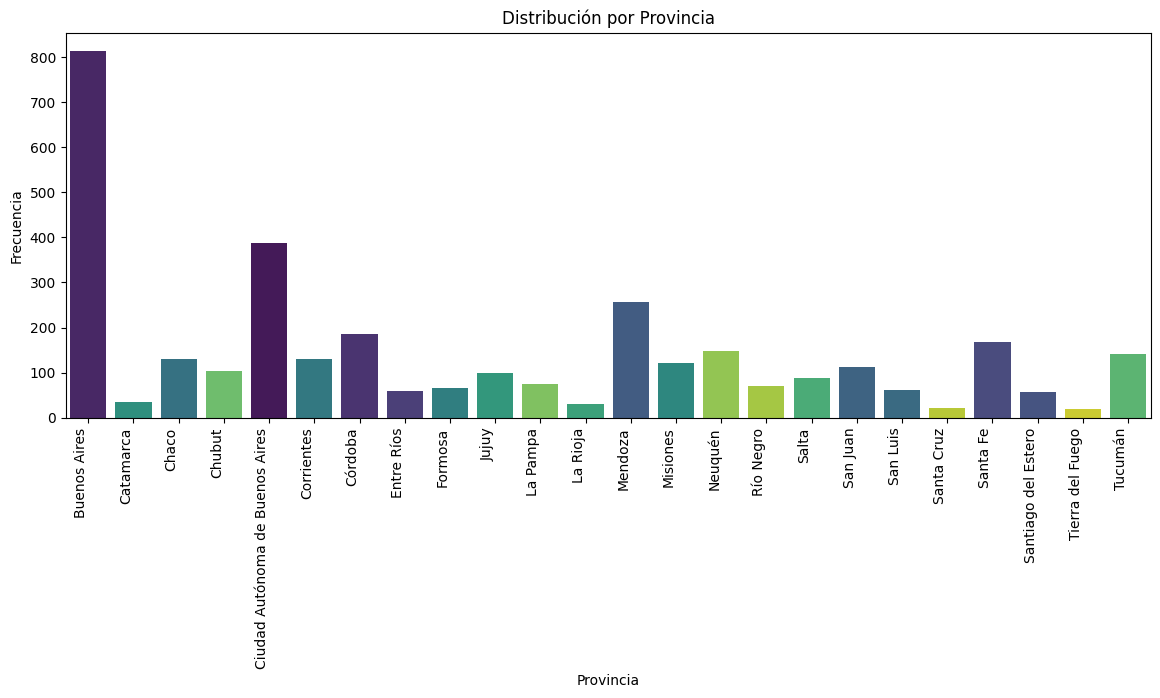

In [17]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='provincia', hue='provincia', order=sorted(df['provincia'].unique()), palette='viridis', legend=False)
plt.title('Distribución por Provincia')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.show()

##Localidad

In [18]:
fq_localidad=df['localidad'].value_counts()
tb_fq_localidad = pd.DataFrame({'Valor': fq_localidad.index , 'Frecuencia': fq_localidad.values})
print(tb_fq_localidad)

                                Valor  Frecuencia
0                                CABA         388
1                           GBA OESTE         219
2                             GBA SUR         218
3                        Gran Mendoza         195
4                           GBA NORTE         177
5                Neuquén / Cipolletti         149
6                        Gran Córdoba         138
7          Gran San Miguel de Tucumán         117
8                       Gran San Juan         113
9          Resistencia / Barranqueras         107
10      Rawson / Trelew / Playa Union         103
11                       Gran Posadas         100
12  Rosario / Villa Gobernador Gálvez          99
13                         Corrientes          82
14                  Santa Rosa / Toay          75
15               San Carlos Bariloche          71
16                            Formosa          65
17                         Gran Salta          64
18                 La Plata - Berisso          59


Tamaño de Localidad

In [19]:
fq_tamanio=df['tamanio'].value_counts()
tb_fq_tamanio = pd.DataFrame({'Valor': fq_tamanio.index , 'Frecuencia': fq_tamanio.values})
print(tb_fq_tamanio)

            Valor  Frecuencia
0   Mas de 400mil        1976
1  80mil a 400mil        1142
2     Menos 80mil         262


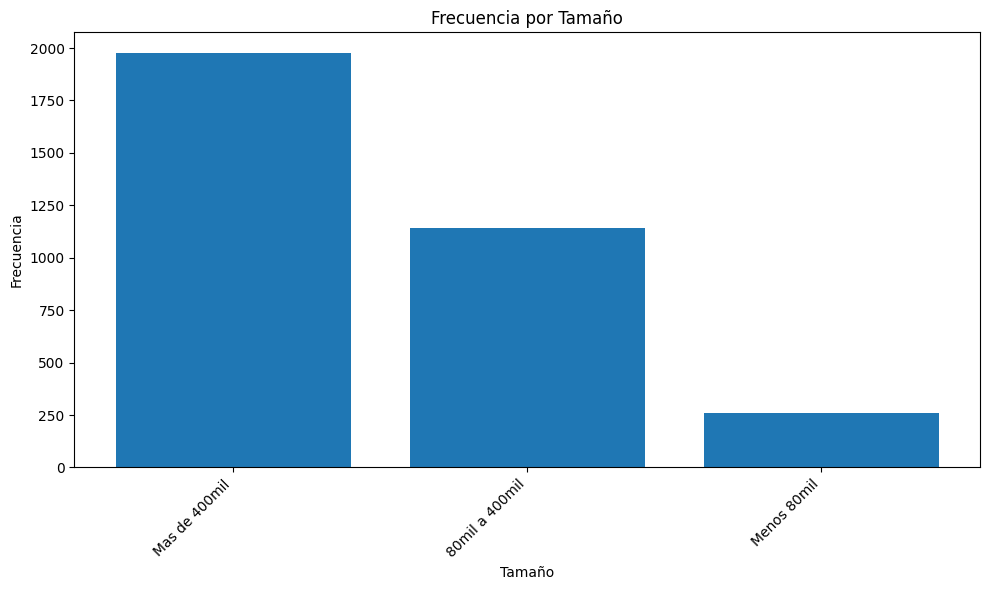

In [20]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.bar(tb_fq_tamanio['Valor'], tb_fq_tamanio['Frecuencia'])
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por Tamaño')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta el espaciado para evitar que las etiquetas se superpongan
plt.show()

##Genero

In [21]:
fq_genero=df['genero'].value_counts()
tb_fq_genero = pd.DataFrame({'Valor': fq_genero.index , 'Frecuencia': fq_genero.values})
print(tb_fq_genero)

        Valor  Frecuencia
0       Mujer        2005
1       Varón        1374
2  No binario           1


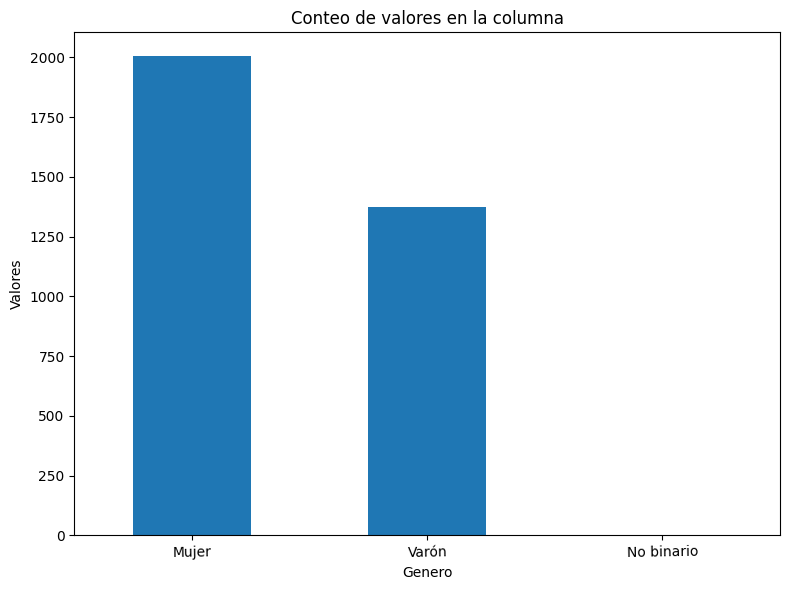

In [22]:
genero = df['genero'].value_counts()

plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
genero.plot.bar()
plt.title('Conteo de valores en la columna')
plt.ylabel('Valores')
plt.xlabel('Genero')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

## Edad

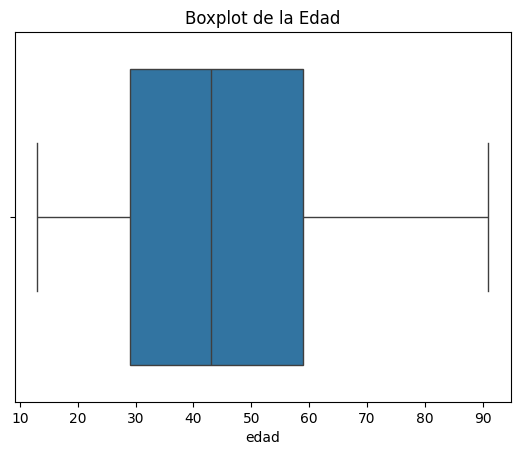

In [23]:
sns.boxplot(x=df['edad'])
plt.title('Boxplot de la Edad')
plt.xlabel('edad')
plt.show()

###Rango etario

In [24]:
fq_grupos_edad=df['grupos_edad'].value_counts()
tb_fq_grupos_edad = pd.DataFrame({'Valor': fq_grupos_edad })
print(tb_fq_grupos_edad)


               Valor
grupos_edad         
30 a 49 años    1181
18 a 29 años     702
50 a 64 años     691
65 años y mas    603
13 a 17 años     203


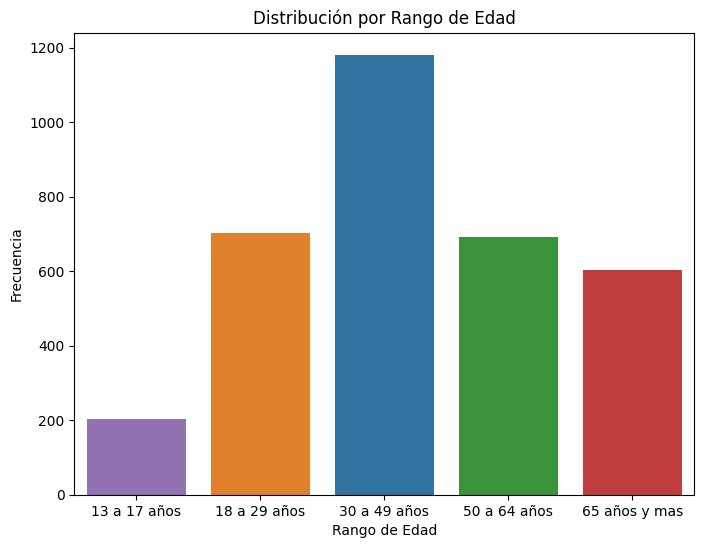

In [25]:
plt.figure(figsize=(8, 6))
#sns.countplot(data=df, x='grupos_edad', order=sorted(df['grupos_edad'].unique()), palette='viridis')
sns.countplot(data=df, x='grupos_edad', hue='grupos_edad', order=sorted(df['grupos_edad'].unique()), legend=False)
plt.title('Distribución por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.show()

Frecuencia por rango etario segmentado por genero

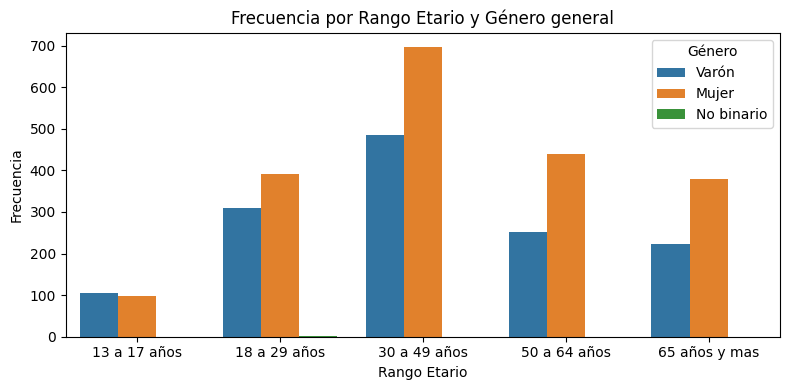

In [26]:
orden = ['13 a 17 años', '18 a 29 años', '30 a 49 años', '50 a 64 años', '65 años y mas'] #Punto 1)

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='grupos_edad', hue='genero', order=orden)
plt.title('Frecuencia por Rango Etario y Género general')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


Frecuencia por rango etario segmentado por genero. Region por region

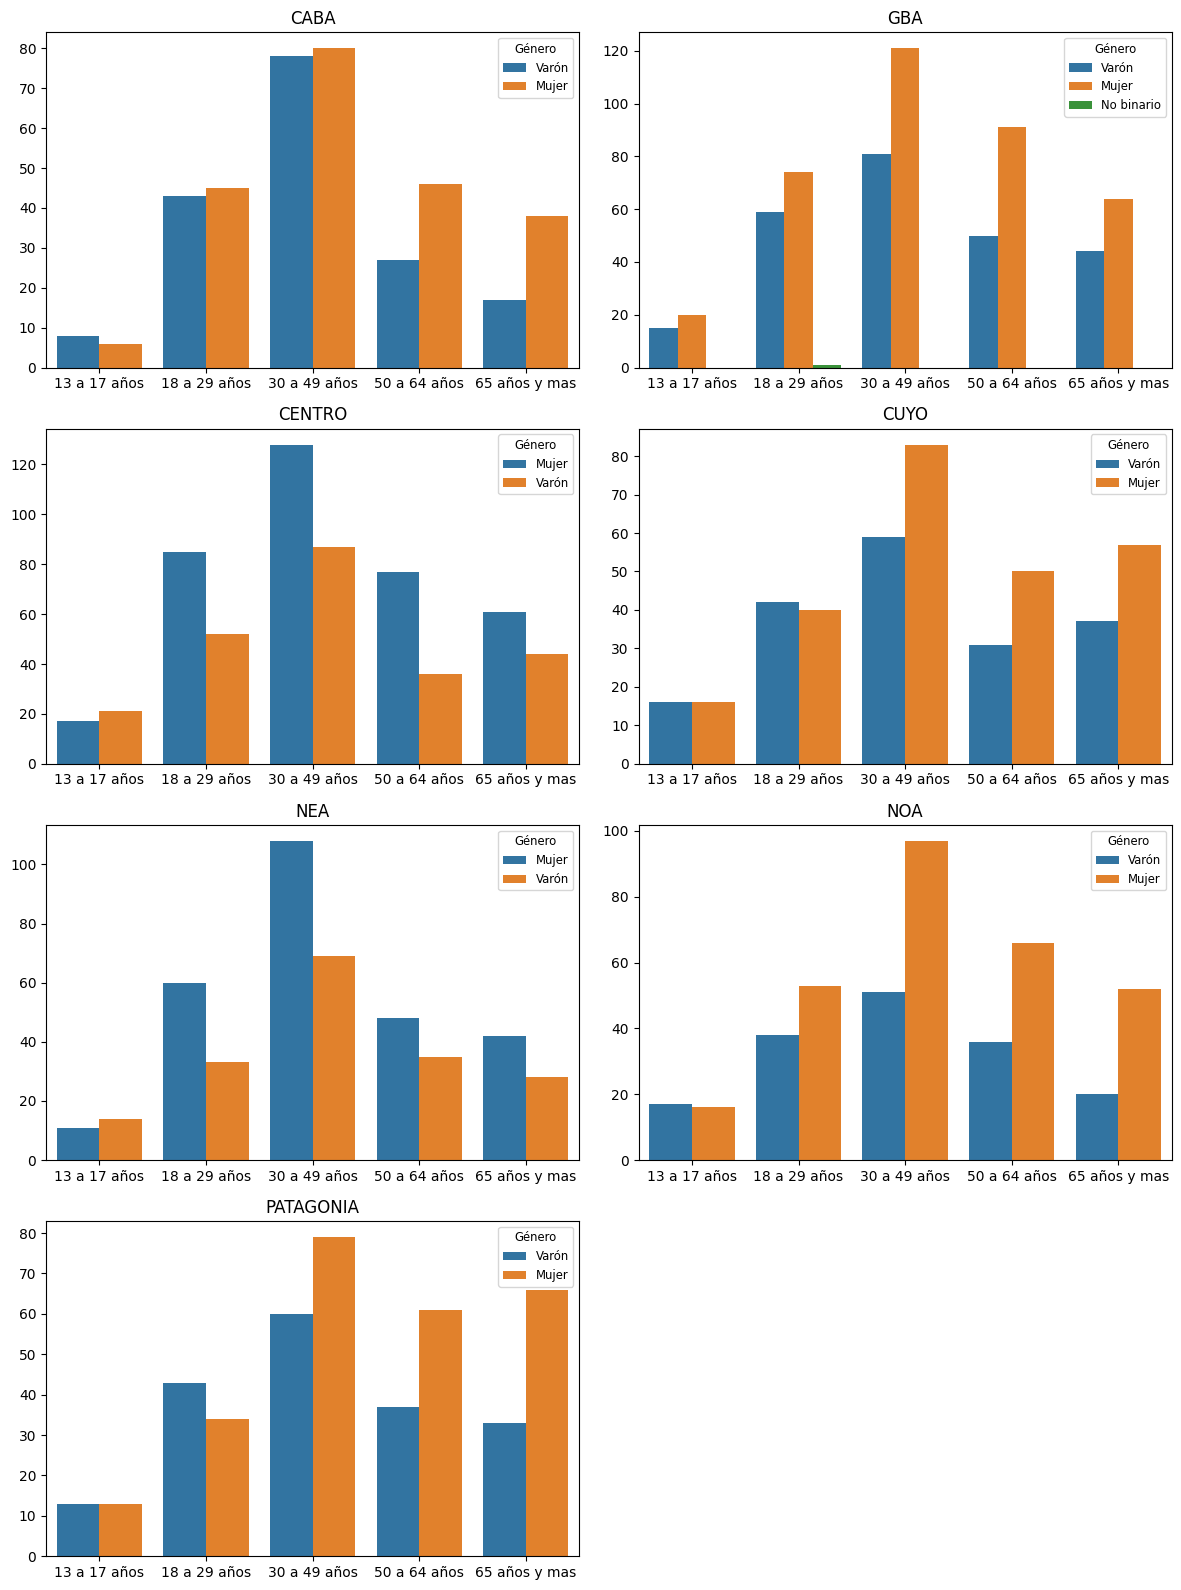

In [27]:
# Iterar sobre cada región: Punto 2)
regiones = df['region'].unique()
n = len(regiones)

cols = 2
rows = (n + cols - 1) // cols  # ceil division

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i in range(n):
    loc = regiones[i]
    df_region = df[df['region'] == loc]
    sns.countplot(data=df_region, x='grupos_edad', hue='genero', order=orden, ax=axes[i])
    axes[i].set_title(f'{loc}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Género', fontsize='small', title_fontsize='small')

# Eliminar los ejes vacíos
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Estudios alcanzados

In [28]:
#Punto 3)
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]

df_estudios = df["soc13.1"].value_counts()
df_estudios = df_estudios.reindex(orden_estudios)
print(df_estudios)

soc13.1
Sin estudios                    NaN
Primarios Incompletos         136.0
Primarios Completos           381.0
Secundarios Incompletos       634.0
Secundarios Completos         940.0
Terciarios Incompletos        204.0
Terciarios Completos          393.0
Universitarios Incompletos    312.0
Universitarios Completos      318.0
Posgrado                       38.0
Ns Nc                           3.0
Name: count, dtype: float64


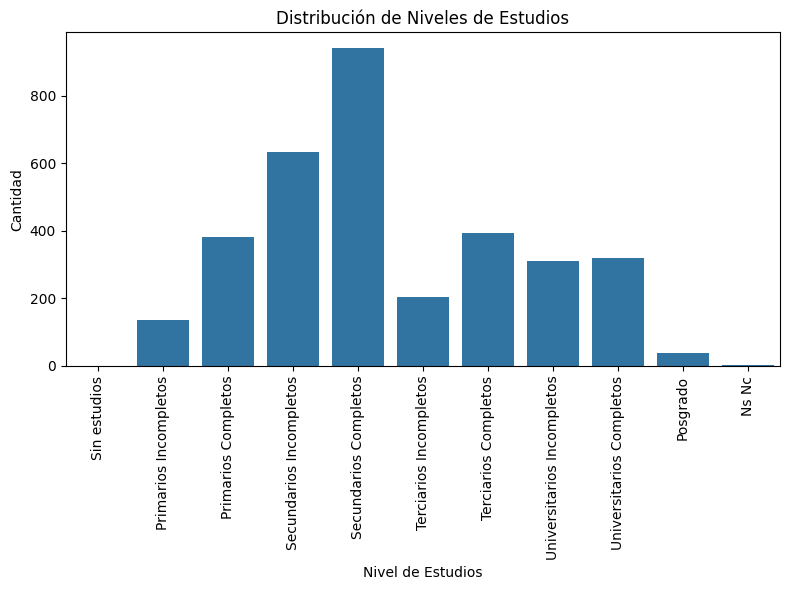

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x="soc13.1", data=df, order=orden_estudios)
plt.title('Distribución de Niveles de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
#Punto 3)
porcentaje = df["soc13.1"].value_counts(normalize=True) * 100
porcentaje = porcentaje.reindex(orden_estudios)
print(porcentaje.round(2))

soc13.1
Sin estudios                    NaN
Primarios Incompletos          4.02
Primarios Completos           11.27
Secundarios Incompletos       18.76
Secundarios Completos         27.81
Terciarios Incompletos         6.04
Terciarios Completos          11.63
Universitarios Incompletos     9.23
Universitarios Completos       9.41
Posgrado                       1.12
Ns Nc                          0.09
Name: proportion, dtype: float64


In [31]:
#Punto 3)
for region in df['region'].unique():
    df_region = df[df['region'] == region]

    # Frecuencia absoluta
    conteo = df_region['soc13.1'].value_counts()

    # Frecuencia relativa (%)
    porcentaje = df_region['soc13.1'].value_counts(normalize=True) * 100

    # Crear tabla combinada
    tabla = pd.DataFrame({
        'Frecuencia': conteo,
        'Porcentaje (%)': porcentaje.round(2)
    })

    # Reordenar según orden_estudios
    tabla = tabla.reindex(orden_estudios).fillna(0)  # Rellena con 0 si faltan categorías

    # Mostrar tabla
    print(f'\n=== Región: {region} ===\n')
    print(tabla)


=== Región: CABA ===

                            Frecuencia  Porcentaje (%)
soc13.1                                               
Sin estudios                       0.0            0.00
Primarios Incompletos              3.0            0.77
Primarios Completos               14.0            3.61
Secundarios Incompletos           36.0            9.28
Secundarios Completos             97.0           25.00
Terciarios Incompletos            21.0            5.41
Terciarios Completos              60.0           15.46
Universitarios Incompletos        60.0           15.46
Universitarios Completos          79.0           20.36
Posgrado                          18.0            4.64
Ns Nc                              0.0            0.00

=== Región: GBA ===

                            Frecuencia  Porcentaje (%)
soc13.1                                               
Sin estudios                       0.0            0.00
Primarios Incompletos             21.0            3.39
Primarios Completos 

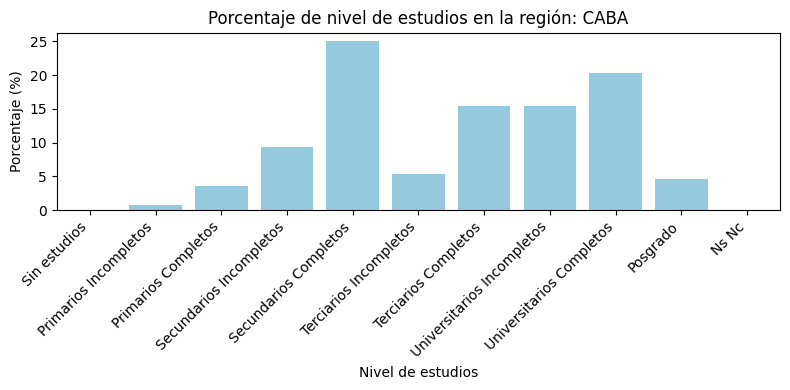

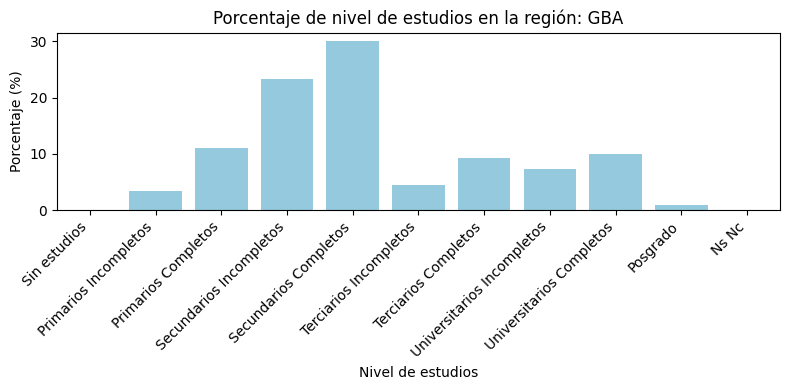

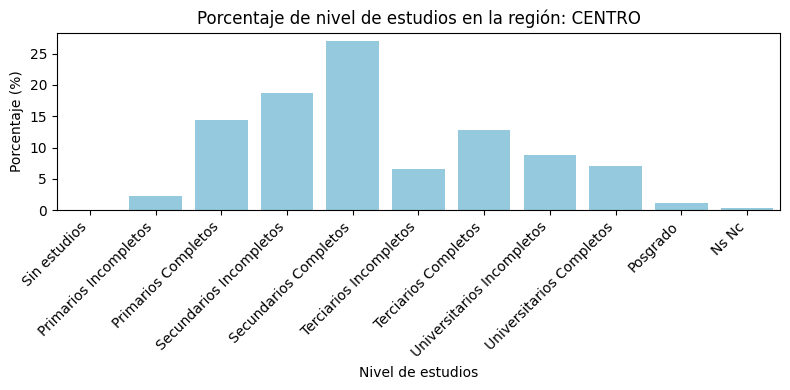

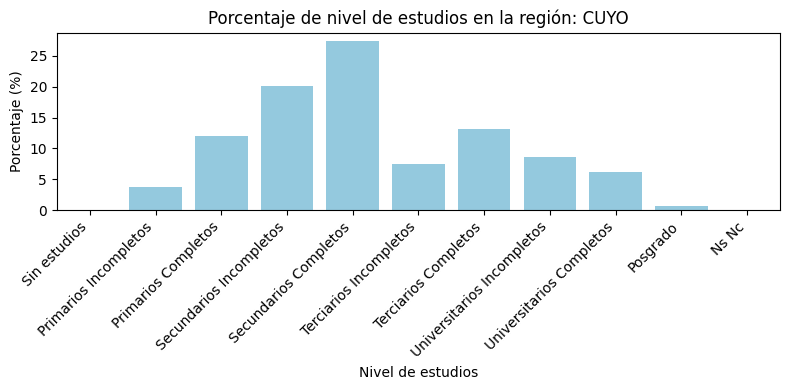

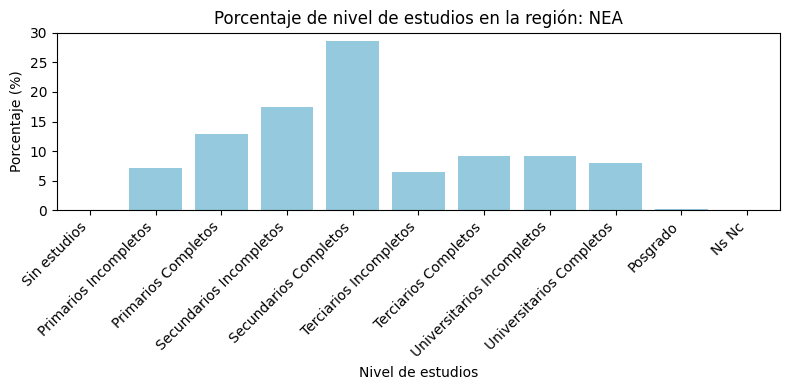

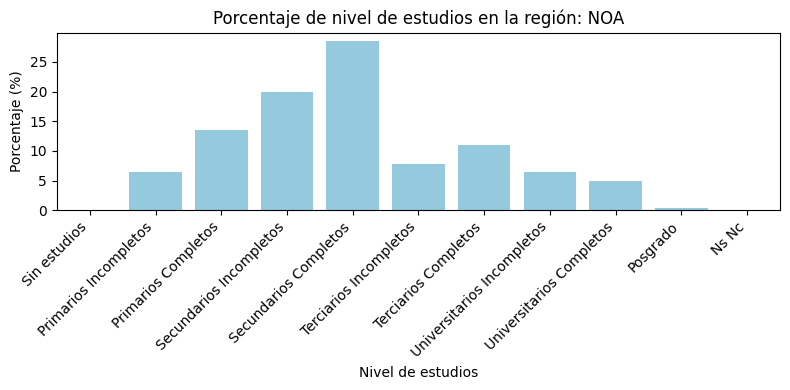

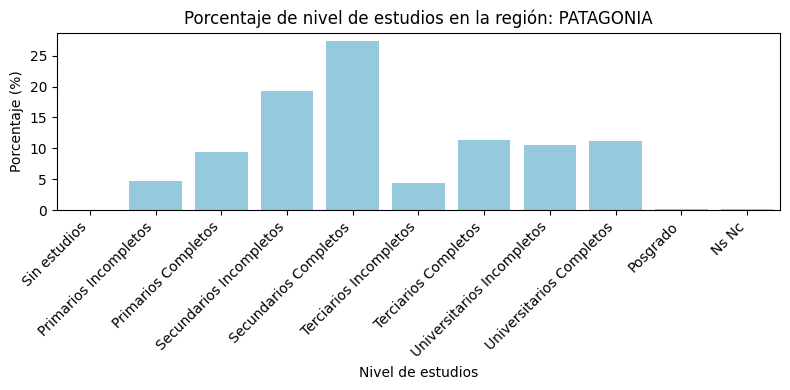

In [32]:
# Iterar por cada región y crear el gráfico: Punto 4)
for region in df['region'].unique():
    df_region = df[df['region'] == region]

    # Calcular el porcentaje relativo de cada nivel de estudios
    porcentaje = df_region['soc13.1'].value_counts(normalize=True) * 100

    # Crear un DataFrame con los porcentajes, reordenado según 'orden_estudios'
    tabla = porcentaje.reindex(orden_estudios).fillna(0).reset_index()
    tabla.columns = ['Nivel de estudios', 'Porcentaje']

    # Graficar
    plt.figure(figsize=(8,4))
    sns.barplot(data=tabla, x='Nivel de estudios', y='Porcentaje', order=orden_estudios, color='skyblue')
    plt.title(f'Porcentaje de nivel de estudios en la región: {region}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Nivel de estudios')

    # Ajuste de la visualización
    plt.tight_layout()
    plt.show()

## **Nivel Socioeconomico**

In [33]:
fq_nivel_socioeconomico=df['niv_socioe'].value_counts()
tb_fq_fq_nivel_socioeconomico = pd.DataFrame({'Valor': fq_nivel_socioeconomico.index , 'Frecuencia': fq_nivel_socioeconomico.values})
print(tb_fq_fq_nivel_socioeconomico)

  Valor  Frecuencia
0    C3        1119
1    D1         953
2    C2         648
3   D2E         333
4  ABC1         327


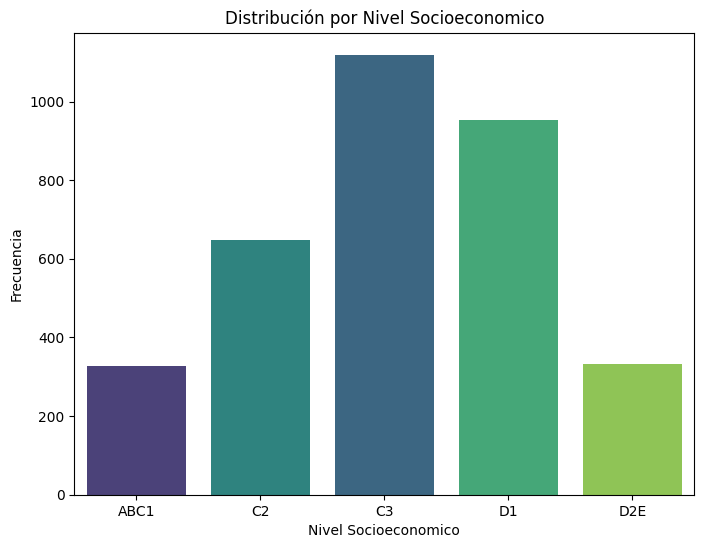

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='niv_socioe', hue='niv_socioe', order=sorted(df['niv_socioe'].unique()), palette='viridis', legend=False)
plt.title('Distribución por Nivel Socioeconomico')
plt.xlabel('Nivel Socioeconomico')
plt.ylabel('Frecuencia')
plt.show()

Situacion de Trabajo




In [35]:
nombres_situacion_trabajo = {
    'No trabajas pero buscás trabajo/ No trabaja pero busca traba': 'No trabajas pero buscás trabajo',
    'No trabajás, sos estudiante/ No trabaja, es estudiante(pasa': 'No trabajás, sos estudiante)',
    'No trabajás, sos jubilado/a/ No trabaja, es jubilado/a': 'No trabajás, sos jubilado/a',
    'No trabajás, sos la/el principal responsable de las tareas d': 'No trabajás, sos responsable de las tareas del hogar',
    'Trabajás/trabaja (incluye el trabajo en cooperativas)': 'Trabajas',
    'Ns/Nc': 'Ns/Nc'
    # Añade aquí todos los valores que aparecen en tu columna 'soc14.1' y sus correspondientes nombres nuevos.
}

# Renombrar los valores en la columna 'soc14.1'
df['soc14.1_renombrado'] = df['soc14.1'].map(nombres_situacion_trabajo)

# Calcular la frecuencia de la columna renombrada
fq_situacion_trabajo_renombrado = df['soc14.1_renombrado'].value_counts()

# Crear la tabla de frecuencia con los nombres renombrados
tb_fq_situacion_trabajo_renombrado = pd.DataFrame({'Valor': fq_situacion_trabajo_renombrado.index,'Frecuencia': fq_situacion_trabajo_renombrado.values
})

# Imprimir la tabla de frecuencia con los nombres renombrados
print(tb_fq_situacion_trabajo_renombrado)


                                               Valor  Frecuencia
0                                           Trabajas        1980
1                        No trabajás, sos jubilado/a         695
2                       No trabajás, sos estudiante)         329
3  No trabajás, sos responsable de las tareas del...         225
4                    No trabajas pero buscás trabajo         140
5                                              Ns/Nc          11


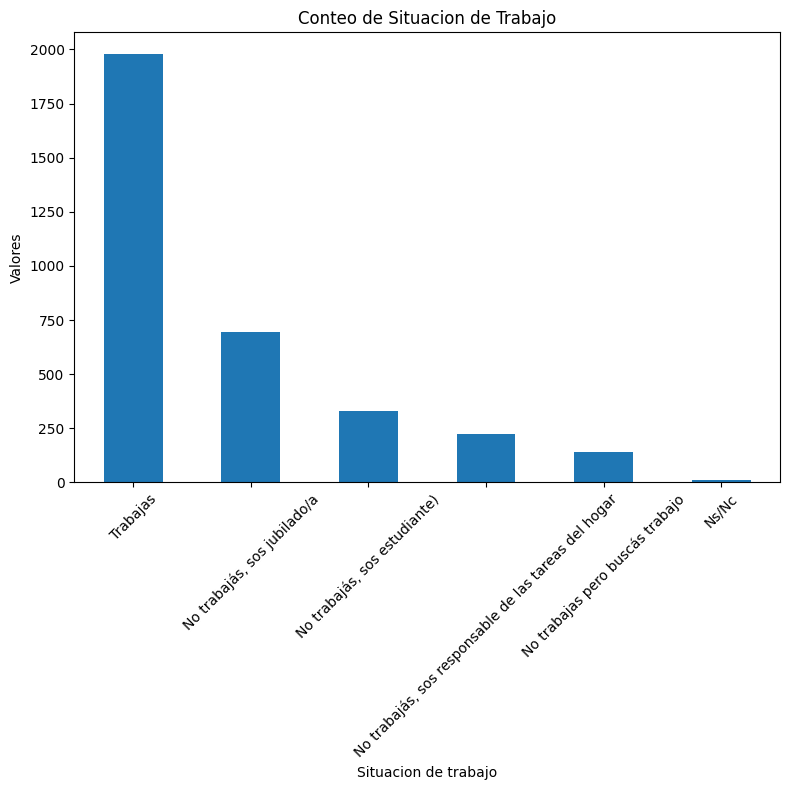

In [36]:
estudios_combinados = df['soc14.1_renombrado'].value_counts()

plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura si es necesario
estudios_combinados.plot.bar()
plt.title('Conteo de Situacion de Trabajo')
plt.ylabel('Valores')
plt.xlabel('Situacion de trabajo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

# **Consumos Culturales**

## Consumo de Televisión

In [37]:
df['tv1'].value_counts()
fq_tv1=df['tv1'].value_counts()
total = len(df['tv1'])
porcentajes = (fq_tv1 / total) * 100
tb_fq_tv1= pd.DataFrame({'Valor': fq_tv1.index , 'Frecuencia': fq_tv1.values, 'Porcentaje': porcentajes})
print(tb_fq_tv1)

    Valor  Frecuencia  Porcentaje
tv1                              
SI     SI        3033   89.733728
NO     NO         347   10.266272


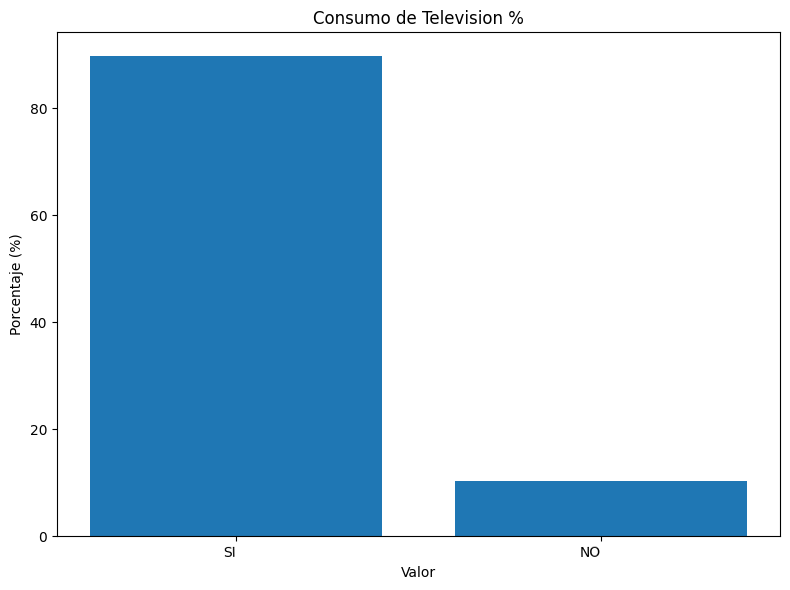

In [38]:

plt.figure(figsize=(8, 6))
plt.bar(tb_fq_tv1['Valor'], tb_fq_tv1['Porcentaje'])

plt.title('Consumo de Television %')
plt.xlabel('Valor')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=1, ha='right')  # Rotar las etiquetas del eje x para mejor lectura
plt.tight_layout()
plt.show()

###Consumo de Television por Rango Etario

In [39]:
consumo_tv_edad = pd.crosstab(df['grupos_edad'], df['tv1'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_tv_edad.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_tv_edad['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_tv_edad['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_tv_edad['Porcentaje_Si'] = porcentaje_si
consumo_tv_edad['Porcentaje_No'] = porcentaje_no

print(consumo_tv_edad)

tv1             NO    SI  Porcentaje_Si  Porcentaje_No
grupos_edad                                           
13 a 17 años    25   178      87.684729      12.315271
18 a 29 años   120   582      82.905983      17.094017
30 a 49 años   132  1049      88.823031      11.176969
50 a 64 años    48   643      93.053546       6.946454
65 años y mas   22   581      96.351575       3.648425


<Figure size 800x600 with 0 Axes>

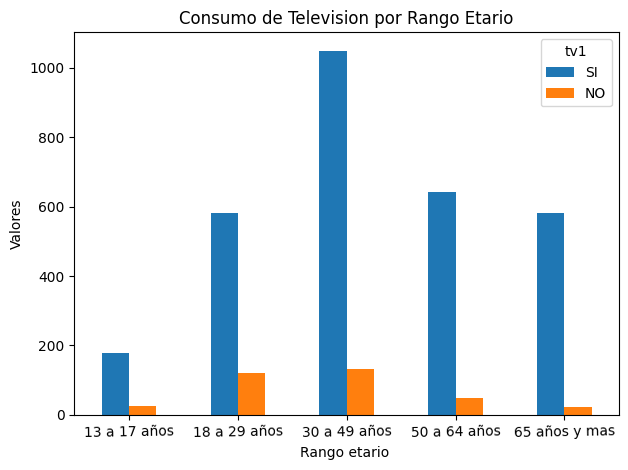

In [40]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_tv_edad[['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Television por Rango Etario')
plt.xlabel('Rango etario ')
plt.ylabel('Valores')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

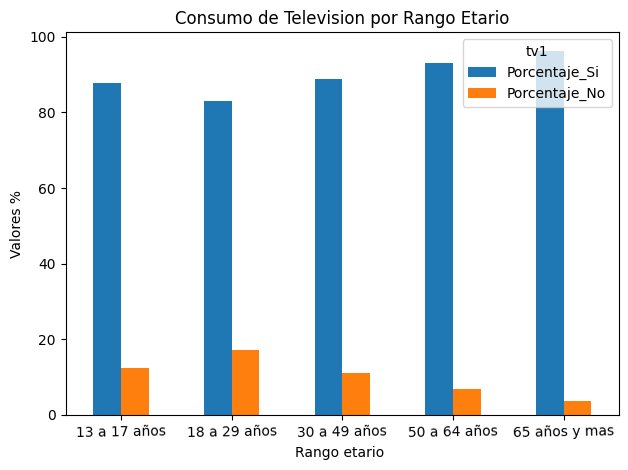

In [41]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_tv_edad[['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Television por Rango Etario')
plt.xlabel('Rango etario ')
plt.ylabel('Valores %')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Television por Nivel de Estudios

In [42]:
consumo_tv_estudios = pd.crosstab(df["soc13.1"], df['tv1'])
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]
consumo_tv_estudios = consumo_tv_estudios.reindex(orden_estudios)
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_tv_estudios.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_tv_estudios['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_tv_estudios['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_tv_estudios['Porcentaje_Si'] = porcentaje_si
consumo_tv_estudios['Porcentaje_No'] = porcentaje_no

print(consumo_tv_estudios)

tv1                           NO     SI  Porcentaje_Si  Porcentaje_No
soc13.1                                                              
Sin estudios                 NaN    NaN            NaN            NaN
Primarios Incompletos        7.0  129.0      94.852941       5.147059
Primarios Completos         26.0  355.0      93.175853       6.824147
Secundarios Incompletos     66.0  568.0      89.589905      10.410095
Secundarios Completos       84.0  856.0      91.063830       8.936170
Terciarios Incompletos      28.0  176.0      86.274510      13.725490
Terciarios Completos        39.0  354.0      90.076336       9.923664
Universitarios Incompletos  46.0  266.0      85.256410      14.743590
Universitarios Completos    45.0  273.0      85.849057      14.150943
Posgrado                     3.0   35.0      92.105263       7.894737
Ns Nc                        1.0    2.0      66.666667      33.333333


<Figure size 800x600 with 0 Axes>

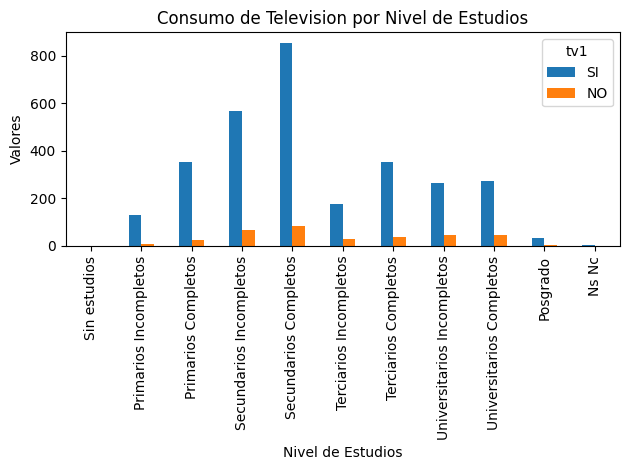

In [43]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_tv_estudios[['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Television por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Valores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

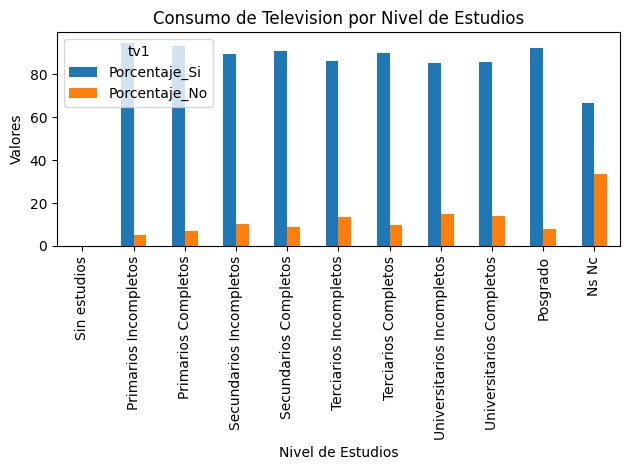

In [44]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_tv_estudios[['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Television por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Valores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

### Consumo de Television por Region

In [45]:
consumo_television_region = pd.crosstab(df['region'], df['tv1'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_television_region.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_television_region['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_television_region['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_television_region['Porcentaje_Si'] = porcentaje_si
consumo_television_region['Porcentaje_No'] = porcentaje_no

print(consumo_television_region)

tv1        NO   SI  Porcentaje_Si  Porcentaje_No
region                                          
CABA       87  301      77.577320      22.422680
CENTRO     62  546      89.802632      10.197368
CUYO       25  406      94.199536       5.800464
GBA        38  582      93.870968       6.129032
NEA        43  405      90.401786       9.598214
NOA        34  412      92.376682       7.623318
PATAGONIA  58  381      86.788155      13.211845


<Figure size 800x600 with 0 Axes>

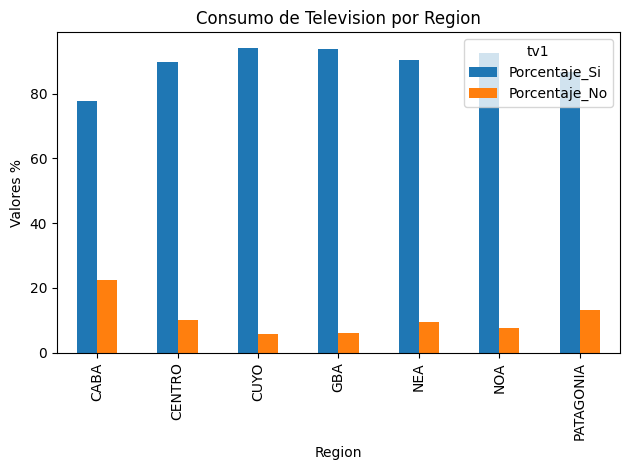

In [46]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_television_region[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Television por Region')
plt.xlabel('Region')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

### Correlacion del Consumo de Television con otras variables

In [47]:

from scipy.stats import chi2_contingency # Para la prueba de Chi-cuadrado

# Variable de consumo que nos interesa
variable_consumo = 'tv1'

# Lista de variables con las que queremos correlacionar el consumo
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

# Función para calcular la V de Cramer
def cramers_v(confusion_matrix):
    """
    Calcula el coeficiente V de Cramer para una tabla de contingencia.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Ajuste para evitar división por cero o resultados mayores a 1
    v = np.sqrt(phi2 / min((k-1), (r-1)))
    return v

print(f"--- Análisis de Asociación con '{variable_consumo}' ---")
print("-" * 50)

# DataFrame para almacenar los resultados
resultados_asociacion = pd.DataFrame(columns=['Variable', 'Chi2_Statistic', 'P_Value', 'Cramers_V', 'Asociacion_Significativa'])

for var in variables_a_correlacionar:
    # 1. Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[var], df[variable_consumo])

    # 2. Realizar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Calcular la V de Cramer
    v_cramer = cramers_v(contingency_table)

    # Evaluar la significancia estadística (comúnmente p < 0.05)
    significativo = "Sí" if p_value < 0.05 else "No"

    # Imprimir resultados
    print(f"\nAsociación entre '{variable_consumo}' y '{var.replace('_', ' ').title()}':")
    print(f"  - Chi-cuadrado (estadístico): {chi2_stat:.2f}")
    print(f"  - Valor P: {p_value:.3f} (Si P < 0.05, la asociación es significativa)")
    print(f"  - V de Cramer: {v_cramer:.3f}")
    print(f"  - Asociación estadísticamente significativa: {significativo}")

    # Guardar en el DataFrame de resultados
    resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{
        'Variable': var.replace('_', ' ').title(),
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Cramers_V': v_cramer,
        'Asociacion_Significativa': significativo
    }])], ignore_index=True)

print("\n" + "="*60)
print("Resumen de la Asociación con el Consumo de Televisión:")
print("="*60)
print(resultados_asociacion.to_string(index=False))

print("\nInterpretación de la V de Cramer:")
print("  - V de Cramer ≈ 0: No hay asociación o es muy débil.")
print("  - V de Cramer ≈ 0.1: Asociación débil.")
print("  - V de Cramer ≈ 0.3: Asociación moderada.")
print("  - V de Cramer ≈ 0.5: Asociación fuerte.")
print("  - V de Cramer ≈ 1.0: Asociación muy fuerte (perfecta).")

--- Análisis de Asociación con 'tv1' ---
--------------------------------------------------

Asociación entre 'tv1' y 'Grupos Edad':
  - Chi-cuadrado (estadístico): 74.45
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.148
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv1' y 'Soc13.1':
  - Chi-cuadrado (estadístico): 27.26
  - Valor P: 0.002 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.090
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv1' y 'Region':
  - Chi-cuadrado (estadístico): 90.83
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.164
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv1' y 'Niv Socioe':
  - Chi-cuadrado (estadístico): 15.57
  - Valor P: 0.004 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.068
  - Asociación estadísticamente significativa: Sí

Resumen de la Asociación con el Consumo de Televi

/tmp/ipython-input-4100756385.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{


/tmp/ipython-input-1894336333.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')


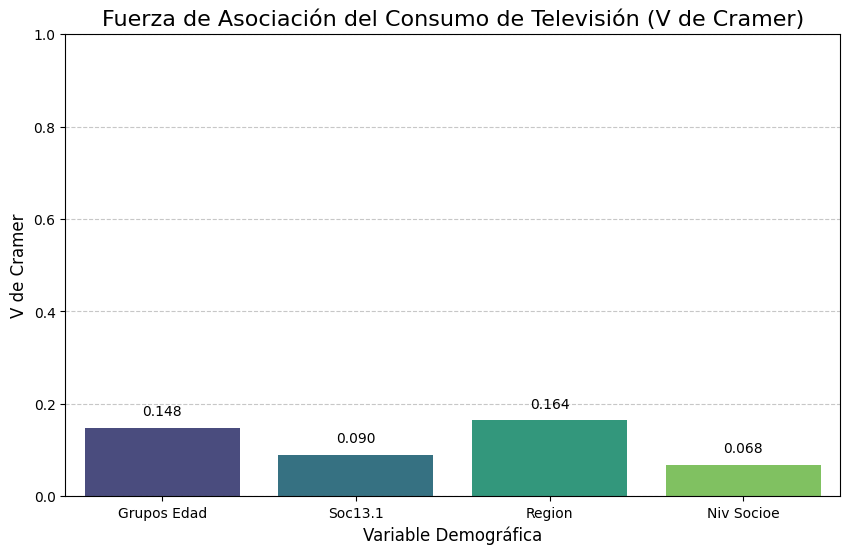

In [48]:
# Asegúrate de que 'tv1' sea categórica, por si acaso
df['tv1'] = df['tv1'].astype('category')

# Lista de variables con las que queremos correlacionar/asociar 'tv1'
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

resultados_asociacion = []

for var in variables_a_correlacionar:
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var], df['tv1'])

    # Calcular Chi-cuadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

    # Calcular V de Cramer
    n = tabla_contingencia.sum().sum()
    min_dim = min(tabla_contingencia.shape) - 1
    # Evitar división por cero si min_dim es 0 (ej. tabla 1xN o Nx1)
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0

    resultados_asociacion.append({
        'Variable': var.replace("_", " ").title(), # Formatear el nombre para el gráfico
        'V_Cramer': v_cramer,
        'P-valor': p_valor # Incluimos el p-valor también para referencia
    })

# Convertir los resultados a un DataFrame para facilitar el trazado
df_resultados = pd.DataFrame(resultados_asociacion)

# --- Creación del Gráfico ---
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura según sea necesario

# Usamos Seaborn para crear el gráfico de barras.
# Seaborn es excelente para gráficos estadísticos y se integra bien con Pandas.
sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')

# Añadir los valores de V de Cramer sobre cada barra para mayor precisión
for index, row in df_resultados.iterrows():
    plt.text(index, row['V_Cramer'] + 0.02, f"{row['V_Cramer']:.3f}",
             color='black', ha="center", va='bottom', fontsize=10)

    # Opcional: Añadir un indicador si el p-valor no es significativo (por ejemplo, con un asterisco)
    # Aquí decidimos no añadirlo para simplificar el gráfico, ya que el enfoque es V de Cramer.
    # Pero podrías hacerlo si lo necesitas:
    # if row['P-valor'] >= 0.05:
    #     plt.text(index, row['V_Cramer'] + 0.04, "*", color='red', ha="center", va='bottom', fontsize=12)


plt.title('Fuerza de Asociación del Consumo de Televisión (V de Cramer)', fontsize=16)
plt.xlabel('Variable Demográfica', fontsize=12)
plt.ylabel('V de Cramer', fontsize=12)
plt.ylim(0, 1) # La V de Cramer siempre va de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.show()

### Razones de No Consumos de la Categoria Television

####Segmentado por Region

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 42.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


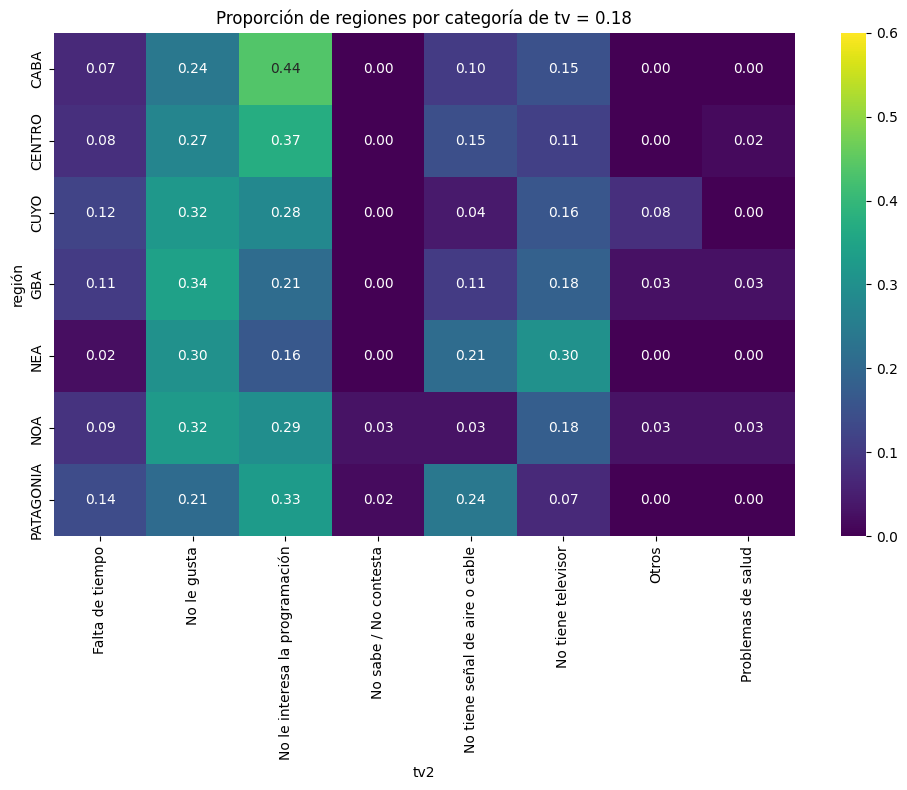

In [49]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['region'], df['tv2'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar las regiones dentro de cada categoría de 'tv2'
cross_tab = pd.crosstab(df['region'], df['tv2'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    cross_tab_prop,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    vmin=0,     # Escala mínima
    vmax=0.6      # Escala máxima
)

# Agregar título con el valor de V de Cramér
plt.title(f"Proporción de regiones por categoría de tv = {cramers_v:.2f}")
plt.xlabel('tv2')
plt.ylabel('región')
plt.tight_layout()
plt.show()


En este grafico vemos que el mayor peso para el NO consumo de Television son razones asociadas a desiciones personales, intereses y gustos.
Sin embargo destacan las razones de falta de conectividad en la Region Patagonica, y en el NEA la falta de conectividad y el hecho de no tener televisor.

####Segmentado por Rango Etario

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 28.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


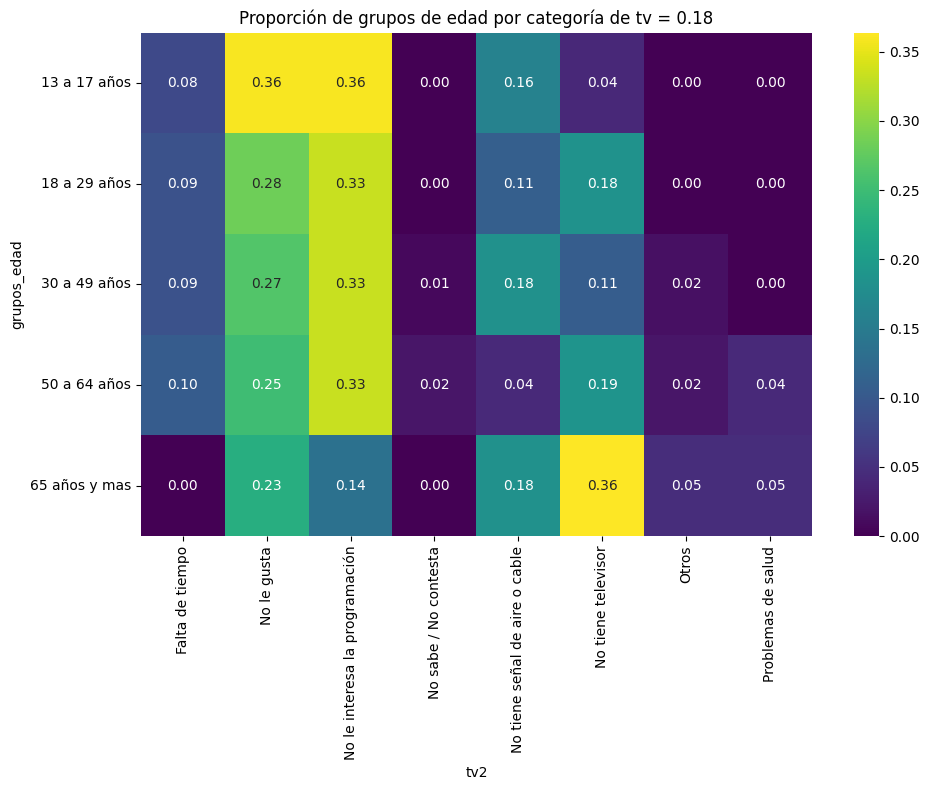

In [50]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['grupos_edad'], df['tv2'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar los grupos de edad dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['grupos_edad'], df['tv2'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Agregar el título con el valor de V de Cramér
plt.title(f"Proporción de grupos de edad por categoría de tv = {cramers_v:.2f}")

# Mostrar la gráfica
plt.xlabel('tv2')
plt.ylabel('grupos_edad')
plt.tight_layout()
plt.show()


Cuando analisamos las razones en relacion al rango etario vuelve a aparecer fuertemente las razones de gusto e interes, asociado con mayor fuerza a edades mas tempranas. Destaca que la razon de mayor incidencia en mayores de años esta ligada a la falta de televisor

## Consumo en plataformas online

In [51]:
df['tv9'].value_counts()
fq_tv9=df['tv9'].value_counts()
total = len(df['tv9'])
porcentajes = (fq_tv9 / total) * 100
tb_fq_tv9= pd.DataFrame({'Valor': fq_tv9.index , 'Frecuencia': fq_tv9.values, 'Porcentaje': porcentajes})
print(tb_fq_tv9)

    Valor  Frecuencia  Porcentaje
tv9                              
SI     SI        2122   62.781065
NO     NO        1258   37.218935


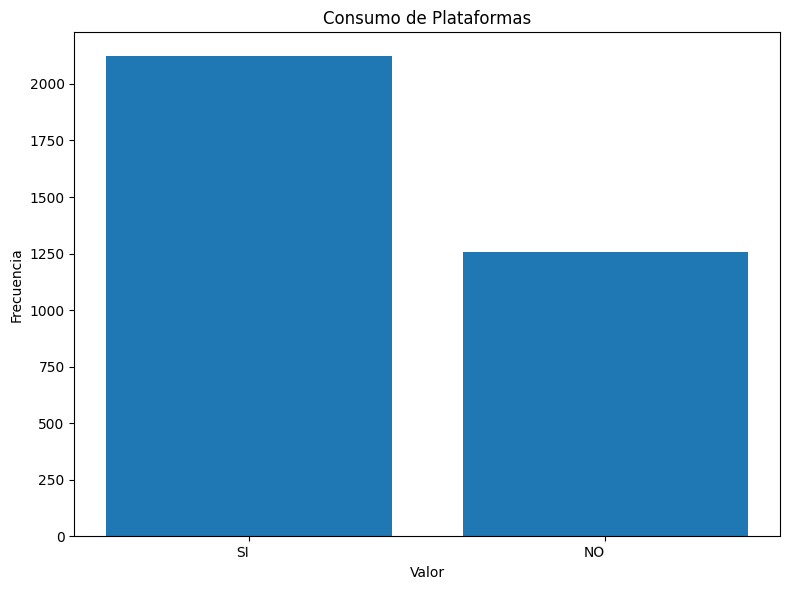

In [52]:
plt.figure(figsize=(8, 6))
plt.bar(tb_fq_tv9['Valor'], tb_fq_tv9['Frecuencia'])
plt.title('Consumo de Plataformas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=1,ha='right')  # Rotar las etiquetas del eje x para mejor lectura
plt.tight_layout()
plt.show()

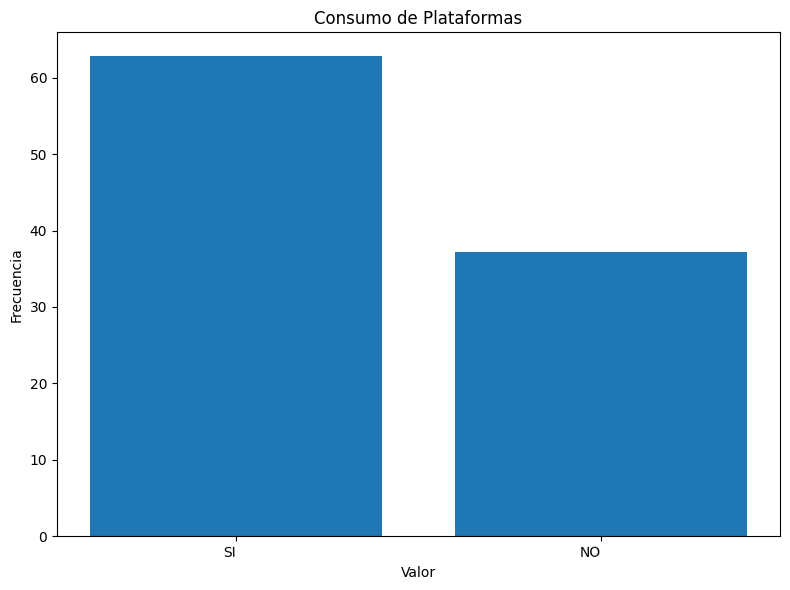

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(tb_fq_tv9['Valor'], tb_fq_tv9['Porcentaje'])
plt.title('Consumo de Plataformas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=1,ha='right')  # Rotar las etiquetas del eje x para mejor lectura
plt.tight_layout()
plt.show()

###Consumo de Plataformas por Rango Etario

In [54]:
consumo_plataformas_edad = pd.crosstab(df['grupos_edad'], df['tv9'])
print(consumo_plataformas_edad)

tv9             NO   SI
grupos_edad            
13 a 17 años    42  161
18 a 29 años   134  568
30 a 49 años   344  837
50 a 64 años   343  348
65 años y mas  395  208


In [55]:
consumo_plataformas_edad = pd.crosstab(df['grupos_edad'], df['tv9'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_plataformas_edad.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_plataformas_edad['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_plataformas_edad['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_plataformas_edad['Porcentaje_Si'] = porcentaje_si
consumo_plataformas_edad['Porcentaje_No'] = porcentaje_no

print(consumo_plataformas_edad)

tv9             NO   SI  Porcentaje_Si  Porcentaje_No
grupos_edad                                          
13 a 17 años    42  161      79.310345      20.689655
18 a 29 años   134  568      80.911681      19.088319
30 a 49 años   344  837      70.872142      29.127858
50 a 64 años   343  348      50.361795      49.638205
65 años y mas  395  208      34.494196      65.505804


<Figure size 800x600 with 0 Axes>

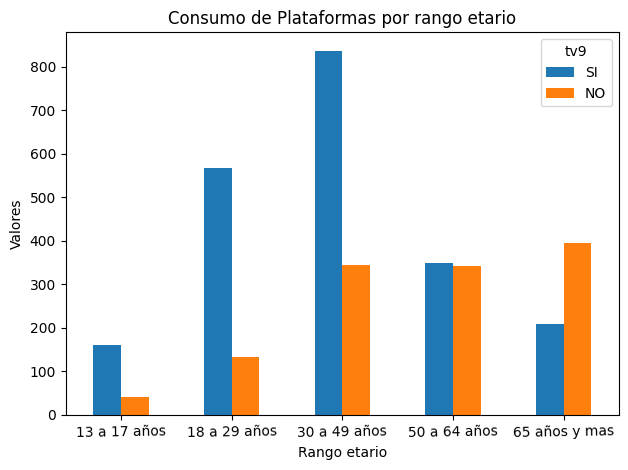

In [56]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_plataformas_edad[['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Plataformas por rango etario')
plt.ylabel('Valores')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

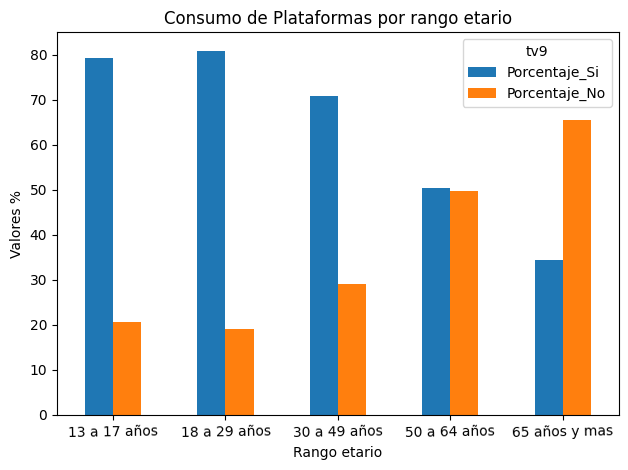

In [57]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_plataformas_edad[['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Plataformas por rango etario')
plt.ylabel('Valores %')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Cosumo de Plataformas por Nivel de Estudios

In [58]:
consumo_plataformas_estudios = pd.crosstab(df['soc13.1'], df['tv9'])
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]
consumo_plataformas_estudios = consumo_plataformas_estudios.reindex(orden_estudios)
# Calcular el total por fila (por grupo de estudios)
total_por_grupo = consumo_plataformas_estudios.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de estudios
porcentaje_si = (consumo_plataformas_estudios['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de estudios
porcentaje_no = (consumo_plataformas_estudios['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_plataformas_estudios['Porcentaje_Si'] = porcentaje_si
consumo_plataformas_estudios['Porcentaje_No'] = porcentaje_no

print(consumo_plataformas_estudios)

tv9                            NO     SI  Porcentaje_Si  Porcentaje_No
soc13.1                                                               
Sin estudios                  NaN    NaN            NaN            NaN
Primarios Incompletos       116.0   20.0      14.705882      85.294118
Primarios Completos         266.0  115.0      30.183727      69.816273
Secundarios Incompletos     243.0  391.0      61.671924      38.328076
Secundarios Completos       317.0  623.0      66.276596      33.723404
Terciarios Incompletos       56.0  148.0      72.549020      27.450980
Terciarios Completos        114.0  279.0      70.992366      29.007634
Universitarios Incompletos   58.0  254.0      81.410256      18.589744
Universitarios Completos     62.0  256.0      80.503145      19.496855
Posgrado                      6.0   32.0      84.210526      15.789474
Ns Nc                         2.0    1.0      33.333333      66.666667


<Figure size 800x600 with 0 Axes>

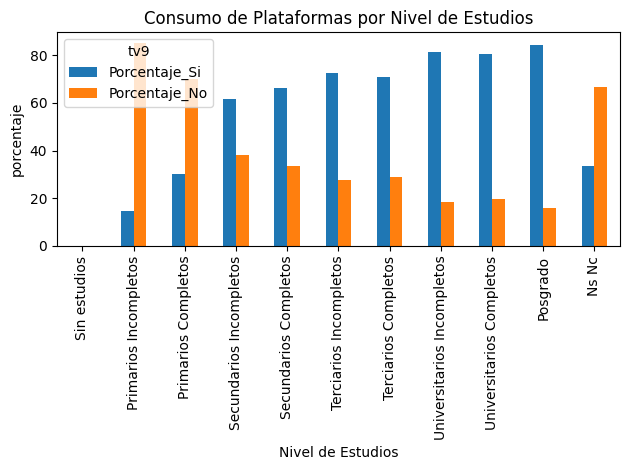

In [59]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_plataformas_estudios[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Plataformas por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('porcentaje')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Plataformas por Region

In [60]:
consumo_plataforma_region = pd.crosstab(df['region'], df['tv9'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_plataforma_region.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_plataforma_region['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_plataforma_region['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_plataforma_region['Porcentaje_Si'] = porcentaje_si
consumo_plataforma_region['Porcentaje_No'] = porcentaje_no

print(consumo_plataforma_region)

tv9         NO   SI  Porcentaje_Si  Porcentaje_No
region                                           
CABA       112  276      71.134021      28.865979
CENTRO     195  413      67.927632      32.072368
CUYO       168  263      61.020882      38.979118
GBA        189  431      69.516129      30.483871
NEA        209  239      53.348214      46.651786
NOA        253  193      43.273543      56.726457
PATAGONIA  132  307      69.931663      30.068337


<Figure size 800x600 with 0 Axes>

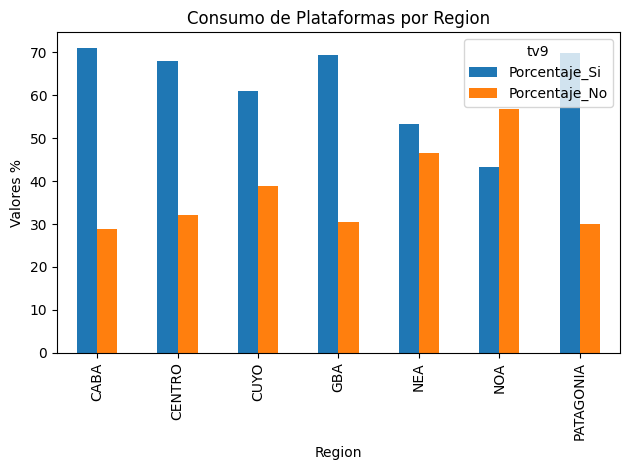

In [61]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_plataforma_region[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Plataformas por Region')
plt.xlabel('Region')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

### Correlacion del Consumo de Plataformas con otras variables

In [62]:

from scipy.stats import chi2_contingency # Para la prueba de Chi-cuadrado

# Variable de consumo que nos interesa
variable_consumo = 'tv9'

# Lista de variables con las que queremos correlacionar el consumo
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

# Función para calcular la V de Cramer
def cramers_v(confusion_matrix):
    """
    Calcula el coeficiente V de Cramer para una tabla de contingencia.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Ajuste para evitar división por cero o resultados mayores a 1
    v = np.sqrt(phi2 / min((k-1), (r-1)))
    return v

print(f"--- Análisis de Asociación con '{variable_consumo}' ---")
print("-" * 50)

# DataFrame para almacenar los resultados
resultados_asociacion = pd.DataFrame(columns=['Variable', 'Chi2_Statistic', 'P_Value', 'Cramers_V', 'Asociacion_Significativa'])

for var in variables_a_correlacionar:
    # 1. Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[var], df[variable_consumo])

    # 2. Realizar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Calcular la V de Cramer
    v_cramer = cramers_v(contingency_table)

    # Evaluar la significancia estadística (comúnmente p < 0.05)
    significativo = "Sí" if p_value < 0.05 else "No"

    # Imprimir resultados
    print(f"\nAsociación entre '{variable_consumo}' y '{var.replace('_', ' ').title()}':")
    print(f"  - Chi-cuadrado (estadístico): {chi2_stat:.2f}")
    print(f"  - Valor P: {p_value:.3f} (Si P < 0.05, la asociación es significativa)")
    print(f"  - V de Cramer: {v_cramer:.3f}")
    print(f"  - Asociación estadísticamente significativa: {significativo}")

    # Guardar en el DataFrame de resultados
    resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{
        'Variable': var.replace('_', ' ').title(),
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Cramers_V': v_cramer,
        'Asociacion_Significativa': significativo
    }])], ignore_index=True)

print("\n" + "="*60)
print("Resumen de la Asociación con el Consumo de Plataformas:")
print("="*60)
print(resultados_asociacion.to_string(index=False))

print("\nInterpretación de la V de Cramer:")
print("  - V de Cramer ≈ 0: No hay asociación o es muy débil.")
print("  - V de Cramer ≈ 0.1: Asociación débil.")
print("  - V de Cramer ≈ 0.3: Asociación moderada.")
print("  - V de Cramer ≈ 0.5: Asociación fuerte.")
print("  - V de Cramer ≈ 1.0: Asociación muy fuerte (perfecta).")

--- Análisis de Asociación con 'tv9' ---
--------------------------------------------------

Asociación entre 'tv9' y 'Grupos Edad':
  - Chi-cuadrado (estadístico): 407.68
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.347
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv9' y 'Soc13.1':
  - Chi-cuadrado (estadístico): 451.50
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.365
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv9' y 'Region':
  - Chi-cuadrado (estadístico): 130.39
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.196
  - Asociación estadísticamente significativa: Sí

Asociación entre 'tv9' y 'Niv Socioe':
  - Chi-cuadrado (estadístico): 253.89
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.274
  - Asociación estadísticamente significativa: Sí

Resumen de la Asociación con el Consumo de Pl

/tmp/ipython-input-1229801659.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{


/tmp/ipython-input-1595679705.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')


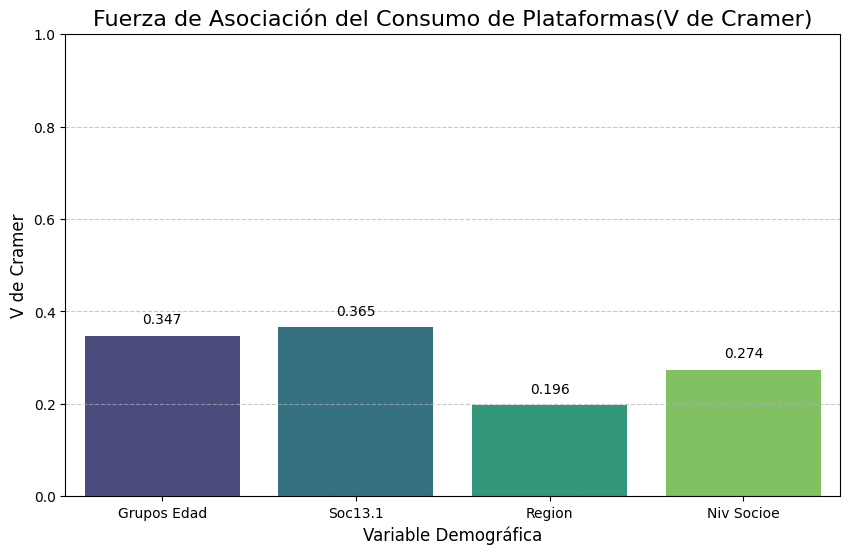

In [63]:
# Asegúrate de que 'tv9' sea categórica, por si acaso
df['tv9'] = df['tv9'].astype('category')

# Lista de variables con las que queremos correlacionar/asociar 'tv9'
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

resultados_asociacion = []

for var in variables_a_correlacionar:
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var], df['tv9'])

    # Calcular Chi-cuadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

    # Calcular V de Cramer
    n = tabla_contingencia.sum().sum()
    min_dim = min(tabla_contingencia.shape) - 1
    # Evitar división por cero si min_dim es 0 (ej. tabla 1xN o Nx1)
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0

    resultados_asociacion.append({
        'Variable': var.replace("_", " ").title(), # Formatear el nombre para el gráfico
        'V_Cramer': v_cramer,
        'P-valor': p_valor # Incluimos el p-valor también para referencia
    })

# Convertir los resultados a un DataFrame para facilitar el trazado
df_resultados = pd.DataFrame(resultados_asociacion)

# --- Creación del Gráfico ---
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura según sea necesario

# Usamos Seaborn para crear el gráfico de barras.
# Seaborn es excelente para gráficos estadísticos y se integra bien con Pandas.
sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')

# Añadir los valores de V de Cramer sobre cada barra para mayor precisión
for index, row in df_resultados.iterrows():
    plt.text(index, row['V_Cramer'] + 0.02, f"{row['V_Cramer']:.3f}",
             color='black', ha="center", va='bottom', fontsize=10)

    # Opcional: Añadir un indicador si el p-valor no es significativo (por ejemplo, con un asterisco)
    # Aquí decidimos no añadirlo para simplificar el gráfico, ya que el enfoque es V de Cramer.
    # Pero podrías hacerlo si lo necesitas:
    # if row['P-valor'] >= 0.05:
    #     plt.text(index, row['V_Cramer'] + 0.04, "*", color='red', ha="center", va='bottom', fontsize=12)


plt.title('Fuerza de Asociación del Consumo de Plataformas(V de Cramer)', fontsize=16)
plt.xlabel('Variable Demográfica', fontsize=12)
plt.ylabel('V de Cramer', fontsize=12)
plt.ylim(0, 1) # La V de Cramer siempre va de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.show()

###Razones de No Consumos de la Categoria Plataformas

####Segmentado por Region

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 60.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


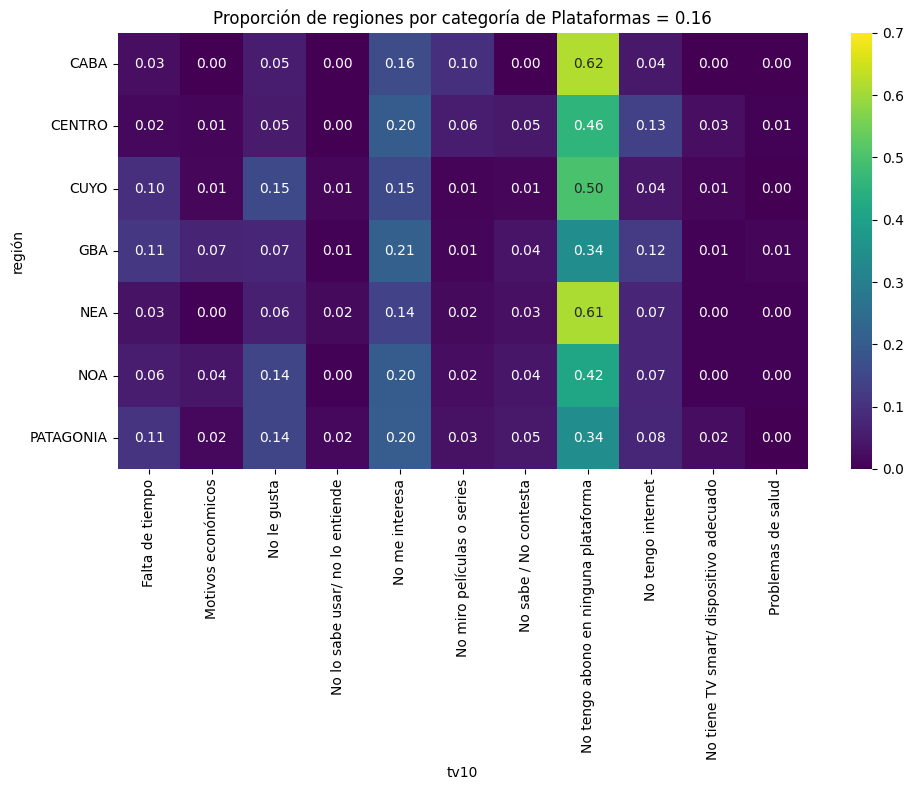

In [64]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['region'], df['tv10'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar las regiones dentro de cada categoría de 'tv2'
cross_tab = pd.crosstab(df['region'], df['tv10'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor con escala de 0 a 1
plt.figure(figsize=(10, 8))
ax=sns.heatmap(
    cross_tab_prop,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    vmin=0,     # Escala mínima
    vmax=0.7      # Escala máxima
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Agregar título con el valor de V de Cramér
plt.title(f"Proporción de regiones por categoría de Plataformas = {cramers_v:.2f}")
plt.xlabel('tv10')
plt.ylabel('región')
plt.tight_layout()
plt.show()

Esta analisis muestra que el principal motivo por el cual no se consumen contenidos de plataformas en relacion con la Region es la falta de abono o suscripcion. Destacan el peso de esta causa en las Regiones CABA y NEA

####Segmentado por Rango Etario

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 40.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


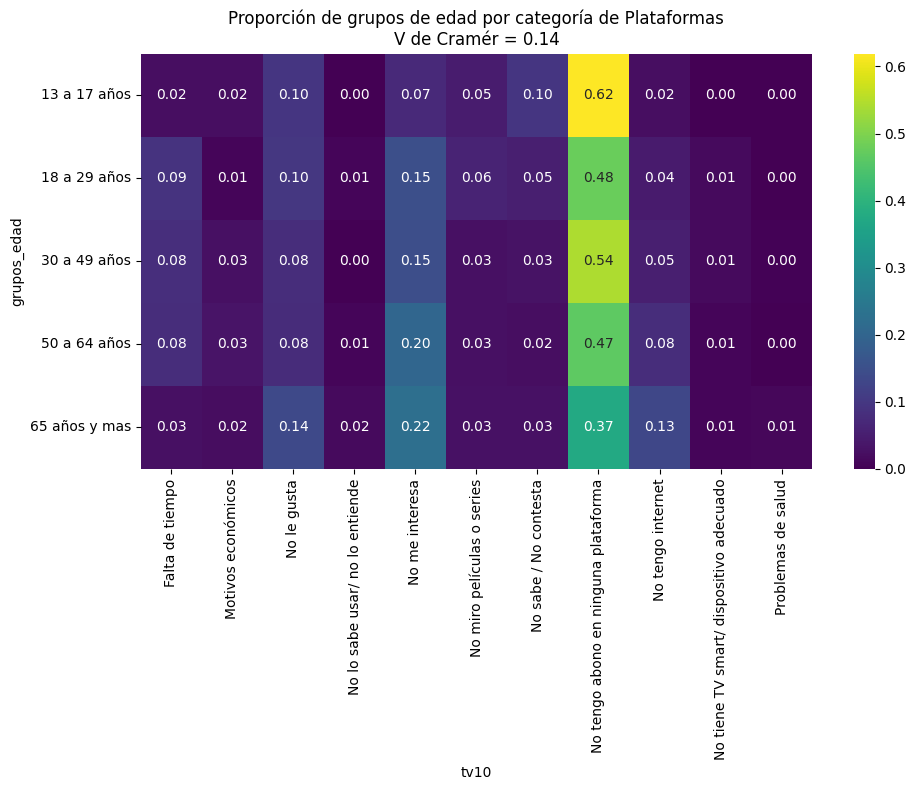

In [65]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['grupos_edad'], df['tv10'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar los grupos de edad dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['grupos_edad'], df['tv10'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Agregar el título con el valor de V de Cramér
plt.title(f"Proporción de grupos de edad por categoría de Plataformas\nV de Cramér = {cramers_v:.2f}")

# Mostrar la gráfica
plt.xlabel('tv10')
plt.ylabel('grupos_edad')
plt.tight_layout()
plt.show()

Aca podemos ver que la razon de falta de abono y suscripcion sigue siendo la mas preponderante, pero vemos ademas que es mas intensa la relacion en las personas de menor rango etario.
Podemos ver tambien que el Interes como razon para no consumir contenidos de Plataformas aumenta con la edad.

##Consumo de Teatro

In [66]:
df['teatro1'].value_counts()
fq_teatro=df['teatro1'].value_counts()
total = len(df['teatro1'])
porcentajes = (fq_teatro / total) * 100
tb_fq_teatro= pd.DataFrame({'Valor': fq_teatro.index , 'Frecuencia': fq_teatro.values, 'Porcentaje': porcentajes})
print(tb_fq_teatro)

        Valor  Frecuencia  Porcentaje
teatro1                              
NO         NO        2807   83.047337
SI         SI         573   16.952663


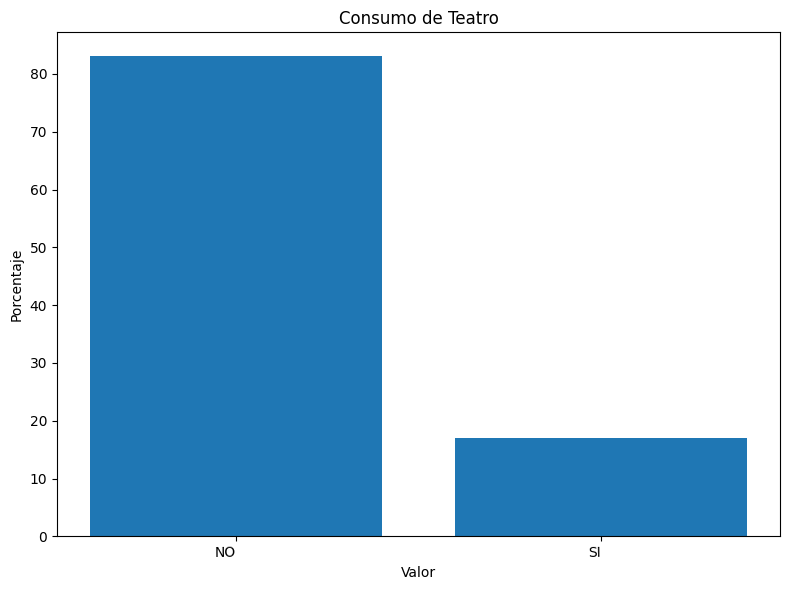

In [67]:
plt.figure(figsize=(8, 6))
plt.bar(tb_fq_teatro['Valor'], tb_fq_teatro['Porcentaje'])
plt.title('Consumo de Teatro')
plt.xlabel('Valor')
plt.ylabel('Porcentaje')
plt.xticks(rotation=1,ha='right')  # Rotar las etiquetas del eje x para mejor lectura
plt.tight_layout()
plt.show()

###Consumo de Teatro por Rango Etario

In [68]:
consumo_teatro_edad = pd.crosstab(df['grupos_edad'], df['teatro1'])
print(consumo_teatro_edad)

teatro1         NO   SI
grupos_edad            
13 a 17 años   164   39
18 a 29 años   604   98
30 a 49 años   954  227
50 a 64 años   564  127
65 años y mas  521   82


In [69]:
consumo_teatro_edad = pd.crosstab(df['grupos_edad'], df['teatro1'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_teatro_edad.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_teatro_edad['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_teatro_edad['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_teatro_edad['Porcentaje_Si'] = porcentaje_si
consumo_teatro_edad['Porcentaje_No'] = porcentaje_no

print(consumo_teatro_edad)

teatro1         NO   SI  Porcentaje_Si  Porcentaje_No
grupos_edad                                          
13 a 17 años   164   39      19.211823      80.788177
18 a 29 años   604   98      13.960114      86.039886
30 a 49 años   954  227      19.220999      80.779001
50 a 64 años   564  127      18.379161      81.620839
65 años y mas  521   82      13.598673      86.401327


<Figure size 800x600 with 0 Axes>

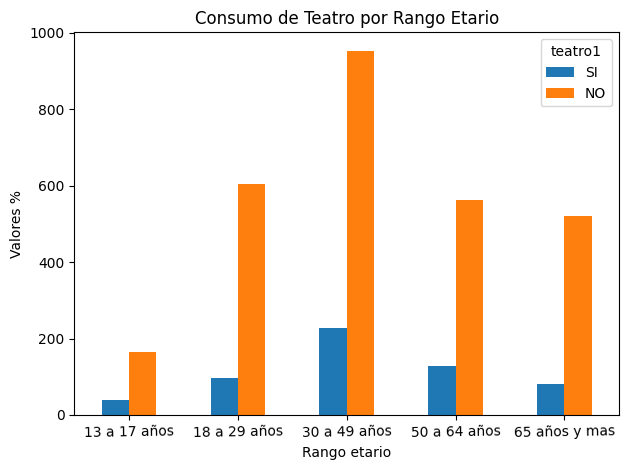

In [70]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_teatro_edad [['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Teatro por Rango Etario')
plt.ylabel('Valores %')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

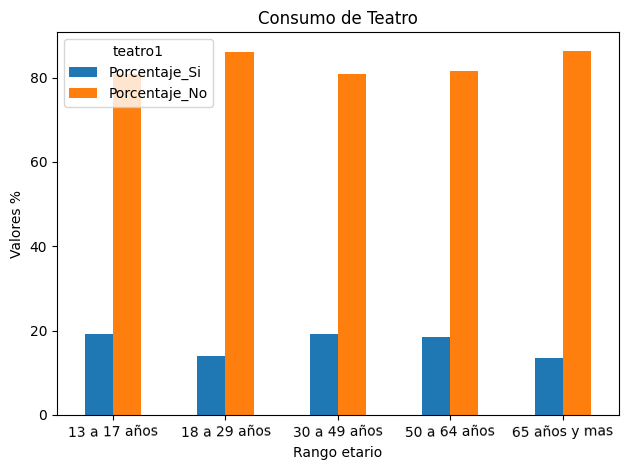

In [71]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_teatro_edad [['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar',)
plt.title('Consumo de Teatro')
plt.ylabel('Valores %')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Teatro por Nivel de Estudios

In [72]:
consumo_teatro_estudios = pd.crosstab(df["soc13.1"], df['teatro1'])
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]
consumo_teatro_estudios = consumo_teatro_estudios.reindex(orden_estudios)
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_teatro_estudios.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_teatro_estudios['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_teatro_estudios['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_teatro_estudios['Porcentaje_Si'] = porcentaje_si
consumo_teatro_estudios['Porcentaje_No'] = porcentaje_no

print(consumo_teatro_estudios)

teatro1                        NO     SI  Porcentaje_Si  Porcentaje_No
soc13.1                                                               
Sin estudios                  NaN    NaN            NaN            NaN
Primarios Incompletos       126.0   10.0       7.352941      92.647059
Primarios Completos         362.0   19.0       4.986877      95.013123
Secundarios Incompletos     562.0   72.0      11.356467      88.643533
Secundarios Completos       813.0  127.0      13.510638      86.489362
Terciarios Incompletos      174.0   30.0      14.705882      85.294118
Terciarios Completos        290.0  103.0      26.208651      73.791349
Universitarios Incompletos  231.0   81.0      25.961538      74.038462
Universitarios Completos    206.0  112.0      35.220126      64.779874
Posgrado                     20.0   18.0      47.368421      52.631579
Ns Nc                         2.0    1.0      33.333333      66.666667


<Figure size 800x600 with 0 Axes>

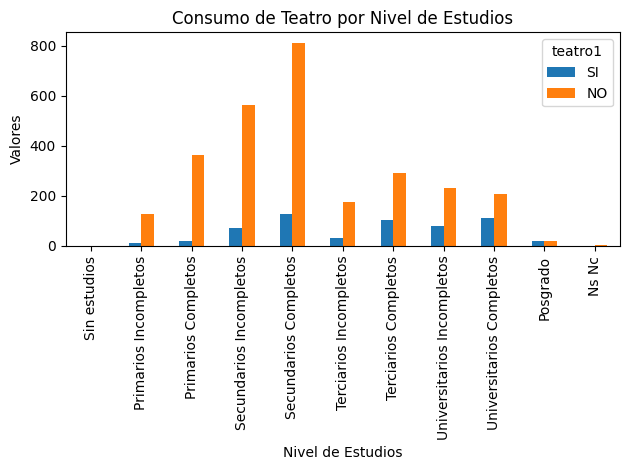

In [73]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_teatro_estudios[['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Teatro por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Valores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

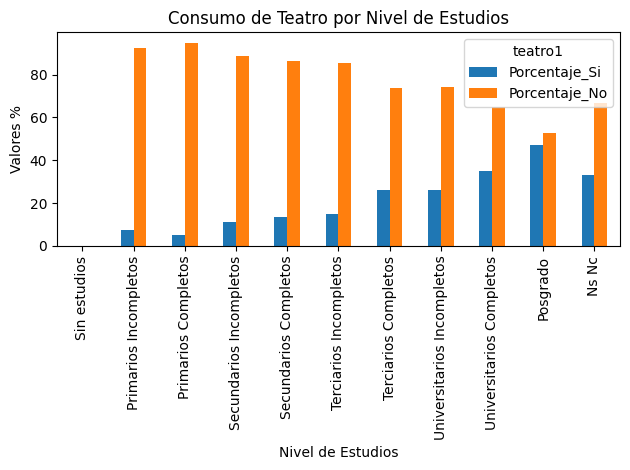

In [74]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_teatro_estudios[['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Teatro por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Teatro por Region

In [75]:
consumo_teatro_region = pd.crosstab(df['region'], df['teatro1'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_teatro_region.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_teatro_region['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_teatro_region['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_teatro_region['Porcentaje_Si'] = porcentaje_si
consumo_teatro_region['Porcentaje_No'] = porcentaje_no

print(consumo_teatro_region)

teatro1     NO   SI  Porcentaje_Si  Porcentaje_No
region                                           
CABA       287  101      26.030928      73.969072
CENTRO     514   94      15.460526      84.539474
CUYO       353   78      18.097448      81.902552
GBA        515  105      16.935484      83.064516
NEA        393   55      12.276786      87.723214
NOA        388   58      13.004484      86.995516
PATAGONIA  357   82      18.678815      81.321185


<Figure size 800x600 with 0 Axes>

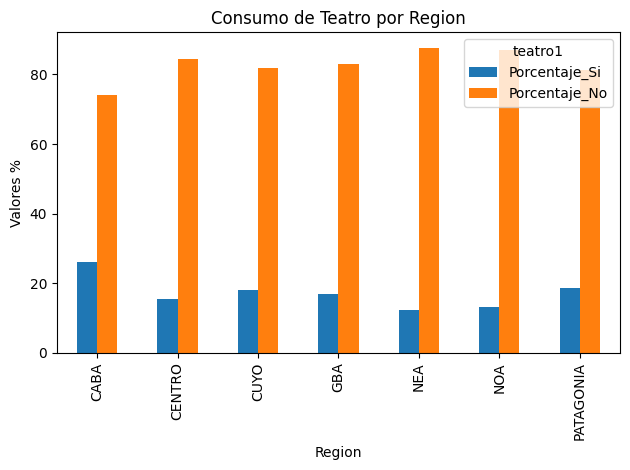

In [76]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_teatro_region[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Teatro por Region')
plt.xlabel('Region')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

### Correlacion del Consumo de Teatro con otras variables

In [77]:

from scipy.stats import chi2_contingency # Para la prueba de Chi-cuadrado

# Variable de consumo que nos interesa
variable_consumo = 'teatro1'

# Lista de variables con las que queremos correlacionar el consumo
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

# Función para calcular la V de Cramer
def cramers_v(confusion_matrix):
    """
    Calcula el coeficiente V de Cramer para una tabla de contingencia.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Ajuste para evitar división por cero o resultados mayores a 1
    v = np.sqrt(phi2 / min((k-1), (r-1)))
    return v

print(f"--- Análisis de Asociación con '{variable_consumo}' ---")
print("-" * 50)

# DataFrame para almacenar los resultados
resultados_asociacion = pd.DataFrame(columns=['Variable', 'Chi2_Statistic', 'P_Value', 'Cramers_V', 'Asociacion_Significativa'])

for var in variables_a_correlacionar:
    # 1. Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[var], df[variable_consumo])

    # 2. Realizar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Calcular la V de Cramer
    v_cramer = cramers_v(contingency_table)

    # Evaluar la significancia estadística (comúnmente p < 0.05)
    significativo = "Sí" if p_value < 0.05 else "No"

    # Imprimir resultados
    print(f"\nAsociación entre '{variable_consumo}' y '{var.replace('_', ' ').title()}':")
    print(f"  - Chi-cuadrado (estadístico): {chi2_stat:.2f}")
    print(f"  - Valor P: {p_value:.3f} (Si P < 0.05, la asociación es significativa)")
    print(f"  - V de Cramer: {v_cramer:.3f}")
    print(f"  - Asociación estadísticamente significativa: {significativo}")

    # Guardar en el DataFrame de resultados
    resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{
        'Variable': var.replace('_', ' ').title(),
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Cramers_V': v_cramer,
        'Asociacion_Significativa': significativo
    }])], ignore_index=True)

print("\n" + "="*60)
print("Resumen de la Asociación con el Consumo de Teatro:")
print("="*60)
print(resultados_asociacion.to_string(index=False))

print("\nInterpretación de la V de Cramer:")
print("  - V de Cramer ≈ 0: No hay asociación o es muy débil.")
print("  - V de Cramer ≈ 0.1: Asociación débil.")
print("  - V de Cramer ≈ 0.3: Asociación moderada.")
print("  - V de Cramer ≈ 0.5: Asociación fuerte.")
print("  - V de Cramer ≈ 1.0: Asociación muy fuerte (perfecta).")

--- Análisis de Asociación con 'teatro1' ---
--------------------------------------------------

Asociación entre 'teatro1' y 'Grupos Edad':
  - Chi-cuadrado (estadístico): 15.33
  - Valor P: 0.004 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.067
  - Asociación estadísticamente significativa: Sí

Asociación entre 'teatro1' y 'Soc13.1':
  - Chi-cuadrado (estadístico): 217.50
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.254
  - Asociación estadísticamente significativa: Sí

Asociación entre 'teatro1' y 'Region':
  - Chi-cuadrado (estadístico): 36.90
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.104
  - Asociación estadísticamente significativa: Sí

Asociación entre 'teatro1' y 'Niv Socioe':
  - Chi-cuadrado (estadístico): 157.67
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.216
  - Asociación estadísticamente significativa: Sí

Resumen de la Asociación co

/tmp/ipython-input-492614307.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{


/tmp/ipython-input-4035829260.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')


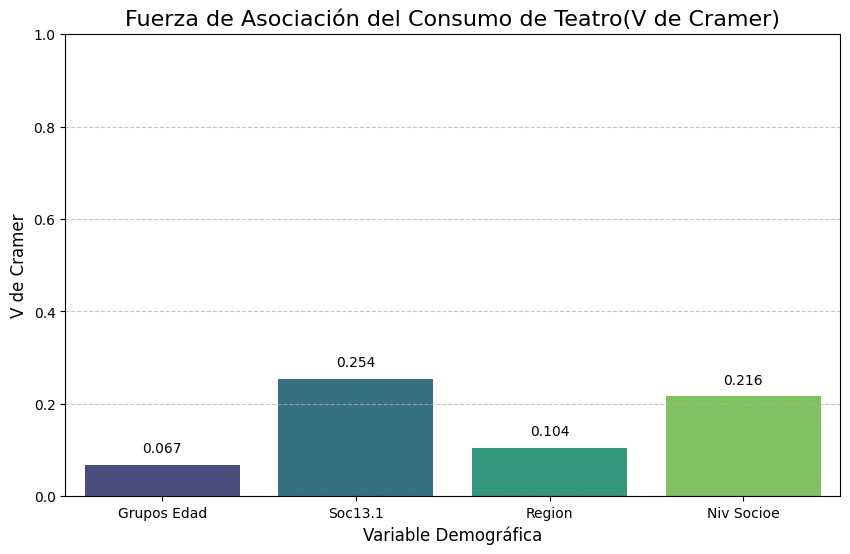

In [78]:
# Asegúrate de que 'teatro1' sea categórica, por si acaso
df['teatro1'] = df['teatro1'].astype('category')

# Lista de variables con las que queremos correlacionar/asociar 'teatro1'
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

resultados_asociacion = []

for var in variables_a_correlacionar:
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var], df['teatro1'])

    # Calcular Chi-cuadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

    # Calcular V de Cramer
    n = tabla_contingencia.sum().sum()
    min_dim = min(tabla_contingencia.shape) - 1
    # Evitar división por cero si min_dim es 0 (ej. tabla 1xN o Nx1)
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0

    resultados_asociacion.append({
        'Variable': var.replace("_", " ").title(), # Formatear el nombre para el gráfico
        'V_Cramer': v_cramer,
        'P-valor': p_valor # Incluimos el p-valor también para referencia
    })

# Convertir los resultados a un DataFrame para facilitar el trazado
df_resultados = pd.DataFrame(resultados_asociacion)

# --- Creación del Gráfico ---
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura según sea necesario

# Usamos Seaborn para crear el gráfico de barras.
# Seaborn es excelente para gráficos estadísticos y se integra bien con Pandas.
sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')

# Añadir los valores de V de Cramer sobre cada barra para mayor precisión
for index, row in df_resultados.iterrows():
    plt.text(index, row['V_Cramer'] + 0.02, f"{row['V_Cramer']:.3f}",
             color='black', ha="center", va='bottom', fontsize=10)

    # Opcional: Añadir un indicador si el p-valor no es significativo (por ejemplo, con un asterisco)
    # Aquí decidimos no añadirlo para simplificar el gráfico, ya que el enfoque es V de Cramer.
    # Pero podrías hacerlo si lo necesitas:
    # if row['P-valor'] >= 0.05:
    #     plt.text(index, row['V_Cramer'] + 0.04, "*", color='red', ha="center", va='bottom', fontsize=12)


plt.title('Fuerza de Asociación del Consumo de Teatro(V de Cramer)', fontsize=16)
plt.xlabel('Variable Demográfica', fontsize=12)
plt.ylabel('V de Cramer', fontsize=12)
plt.ylim(0, 1) # La V de Cramer siempre va de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.show()

###Razones de No Consumos de la Categoria Teatro


####Segmentado por Rango Etario

****

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 56.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


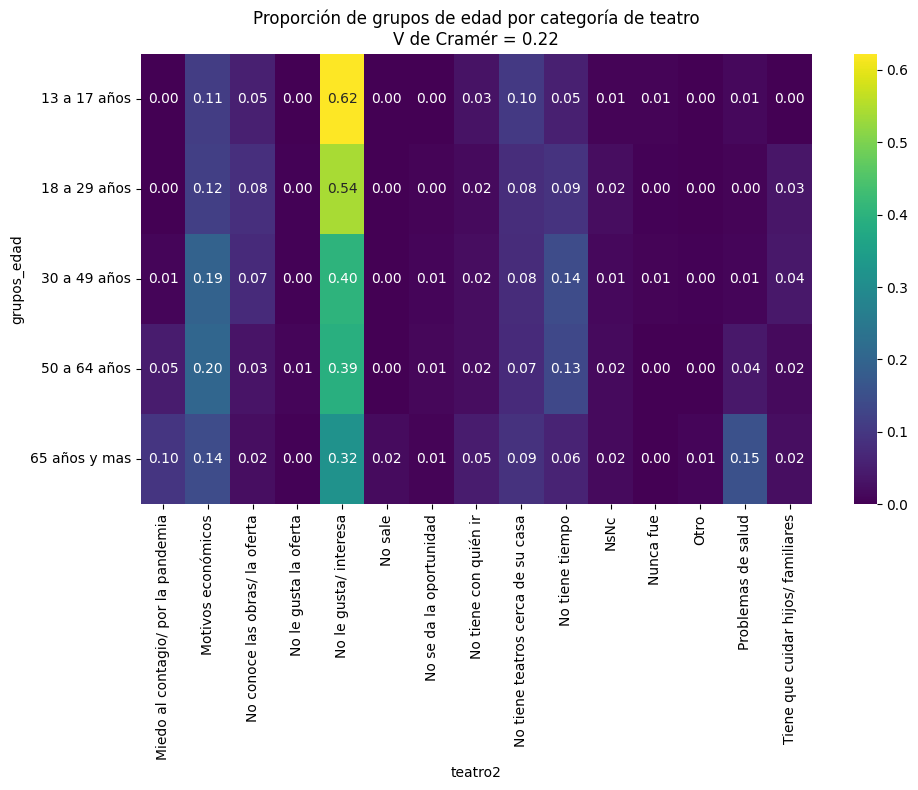

In [79]:
df['teatro2'].value_counts()
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['grupos_edad'], df['teatro2'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar los grupos de edad dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['grupos_edad'], df['teatro2'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Agregar el título con el valor de V de Cramér
plt.title(f"Proporción de grupos de edad por categoría de teatro\nV de Cramér = {cramers_v:.2f}")

# Mostrar la gráfica
plt.xlabel('teatro2')
plt.ylabel('grupos_edad')
plt.tight_layout()
plt.show()


El motivo con mas peso par no cosumir Teatro es la falta de interes o el gusto.Razon que va disminuyendo a mayor edad.
Otro motivo destacado son las razones economicas.

####Segmentado por Region

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 84.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


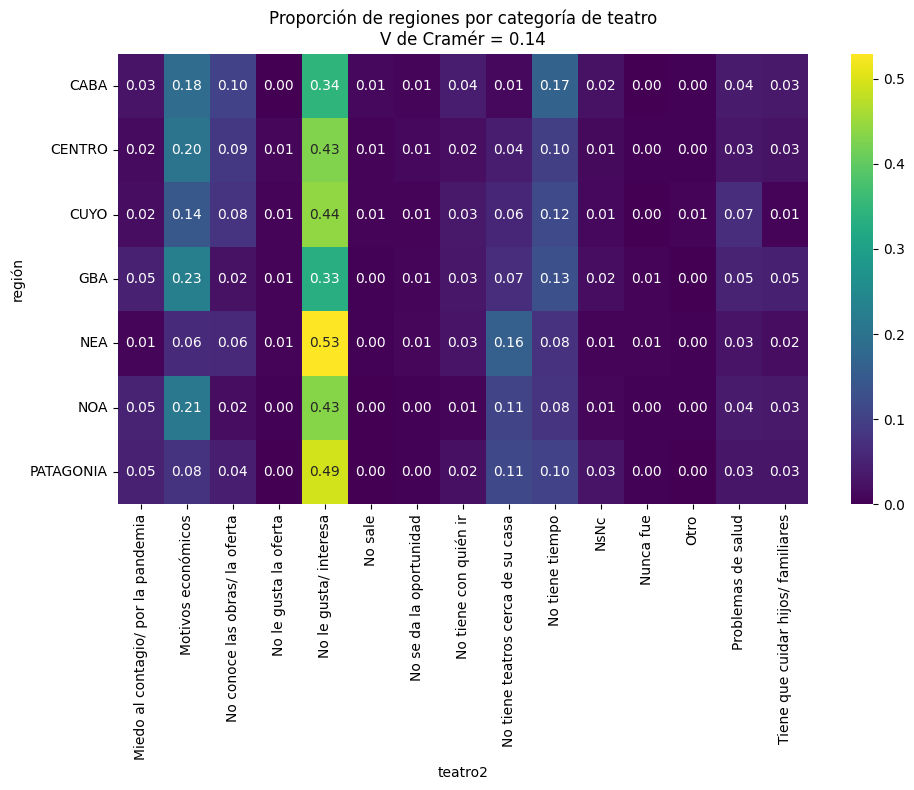

In [80]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['region'], df['teatro2'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar las regiones dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['region'], df['teatro2'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)  # Proporciones por fila

# Graficar el mapa de calor con V de Cramér en el título
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')  # fmt='.2f' para 2 decimales
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# Agregar título con el valor de V de Cramér
plt.title(f"Proporción de regiones por categoría de teatro\nV de Cramér = {cramers_v:.2f}")

# Mostrar la gráfica
plt.xlabel('teatro2')
plt.ylabel('región')
plt.tight_layout()
plt.show()


En este grafico en relacion a las regiones, el principal motivo continua siendo la falta de interes, seguido por los motivos economicos; sin embargo empiezan a aparecer otras razones destacadas, la falta de Teatros en el NEA, y la falta de tiempo en CABA

##Consumo de Musica en vivo

In [81]:
df['musica9'].value_counts()
fq_musica_vivo=df['musica9'].value_counts()
total = len(df['musica9'])
porcentajes = (fq_musica_vivo / total) * 100
tb_fq_musica_vivo= pd.DataFrame({'Valor': fq_musica_vivo.index , 'Frecuencia': fq_musica_vivo.values, 'Porcentaje': porcentajes})
print(tb_fq_musica_vivo)

        Valor  Frecuencia  Porcentaje
musica9                              
NO         NO        2360   69.822485
SI         SI        1020   30.177515


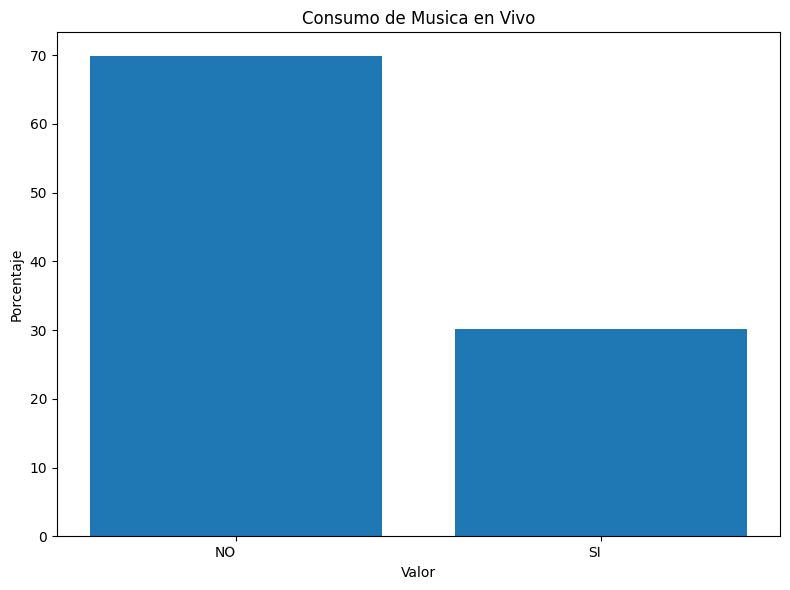

In [82]:
plt.figure(figsize=(8, 6))
plt.bar(tb_fq_musica_vivo['Valor'], tb_fq_musica_vivo['Porcentaje'])
plt.title('Consumo de Musica en Vivo')
plt.xlabel('Valor')
plt.ylabel('Porcentaje')
plt.xticks(rotation=1,ha='right')  # Rotar las etiquetas del eje x para mejor lectura
plt.tight_layout()
plt.show()

###Consumo de Musica en vivo por Rango Etario

In [83]:
consumo_musica_vivo_edad = pd.crosstab(df['grupos_edad'], df['musica9'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_musica_vivo_edad.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_musica_vivo_edad['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_musica_vivo_edad['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_musica_vivo_edad['Porcentaje_Si'] = porcentaje_si
consumo_musica_vivo_edad['Porcentaje_No'] = porcentaje_no

print(consumo_musica_vivo_edad)

musica9         NO   SI  Porcentaje_Si  Porcentaje_No
grupos_edad                                          
13 a 17 años   143   60      29.556650      70.443350
18 a 29 años   399  303      43.162393      56.837607
30 a 49 años   756  425      35.986452      64.013548
50 a 64 años   541  150      21.707670      78.292330
65 años y mas  521   82      13.598673      86.401327


<Figure size 800x600 with 0 Axes>

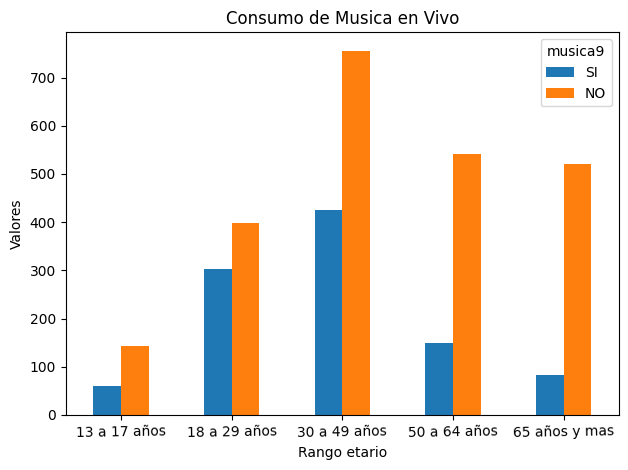

In [84]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_musica_vivo_edad [['SI', 'NO']].plot(kind='bar')
plt.title('Consumo de Musica en Vivo')
plt.ylabel('Valores')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

<Figure size 800x600 with 0 Axes>

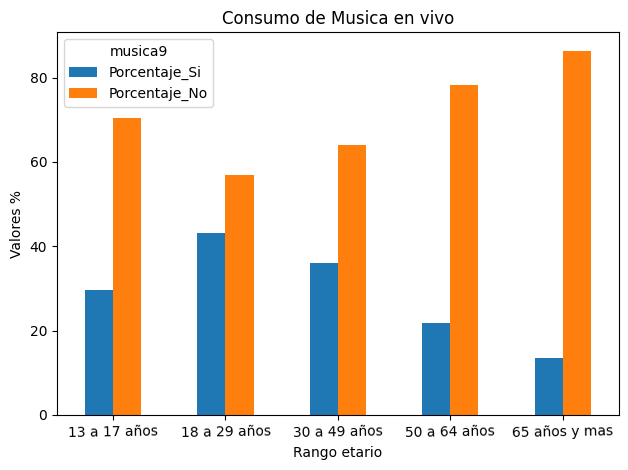

In [85]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_musica_vivo_edad [['Porcentaje_Si', 'Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Musica en vivo')
plt.ylabel('Valores %')
plt.xlabel('Rango etario')
plt.xticks(rotation=1)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Musica en vivo por Nivel de Estudio

In [86]:
consumo_musica_vivo_estudios = pd.crosstab(df["soc13.1"], df['musica9'])
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]

consumo_musica_vivo_estudios = consumo_musica_vivo_estudios.reindex(orden_estudios)
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_musica_vivo_estudios.sum(axis=1)
# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_musica_vivo_estudios['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_musica_vivo_estudios['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_musica_vivo_estudios['Porcentaje_Si'] = porcentaje_si
consumo_musica_vivo_estudios['Porcentaje_No'] = porcentaje_no

print(consumo_musica_vivo_estudios)

musica9                        NO     SI  Porcentaje_Si  Porcentaje_No
soc13.1                                                               
Sin estudios                  NaN    NaN            NaN            NaN
Primarios Incompletos       123.0   13.0       9.558824      90.441176
Primarios Completos         324.0   57.0      14.960630      85.039370
Secundarios Incompletos     470.0  164.0      25.867508      74.132492
Secundarios Completos       661.0  279.0      29.680851      70.319149
Terciarios Incompletos      135.0   69.0      33.823529      66.176471
Terciarios Completos        251.0  142.0      36.132316      63.867684
Universitarios Incompletos  162.0  150.0      48.076923      51.923077
Universitarios Completos    189.0  129.0      40.566038      59.433962
Posgrado                     24.0   14.0      36.842105      63.157895
Ns Nc                         2.0    1.0      33.333333      66.666667


<Figure size 800x600 with 0 Axes>

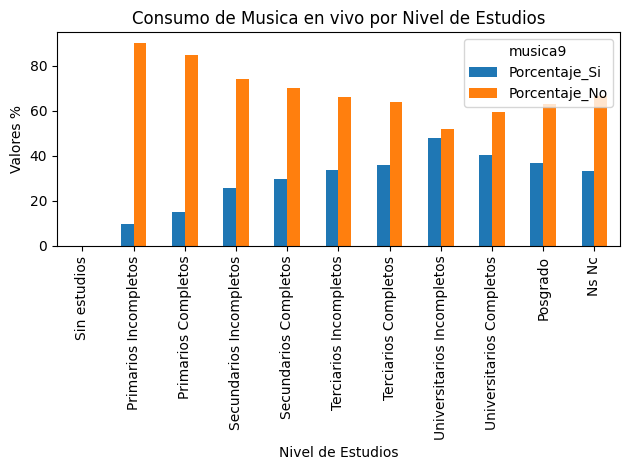

In [87]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_musica_vivo_estudios[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar', )
plt.title('Consumo de Musica en vivo por Nivel de Estudios')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

###Consumo de Musica en vivo por Region

In [88]:
consumo_musica_vivo_region = pd.crosstab(df['region'], df['musica9'])
# Calcular el total por fila (por grupo de edad)
total_por_grupo = consumo_musica_vivo_region.sum(axis=1)

# Calcular el porcentaje de 'Sí' por grupo de edad
porcentaje_si = (consumo_musica_vivo_region['SI'] / total_por_grupo) * 100

# Calcular el porcentaje de 'No' por grupo de edad
porcentaje_no = (consumo_musica_vivo_region['NO'] / total_por_grupo) * 100

# Crear nuevas columnas con los porcentajes
consumo_musica_vivo_region['Porcentaje_Si'] = porcentaje_si
consumo_musica_vivo_region['Porcentaje_No'] = porcentaje_no

print(consumo_musica_vivo_region)

musica9     NO   SI  Porcentaje_Si  Porcentaje_No
region                                           
CABA       245  143      36.855670      63.144330
CENTRO     412  196      32.236842      67.763158
CUYO       312  119      27.610209      72.389791
GBA        465  155      25.000000      75.000000
NEA        313  135      30.133929      69.866071
NOA        336  110      24.663677      75.336323
PATAGONIA  277  162      36.902050      63.097950


<Figure size 800x600 with 0 Axes>

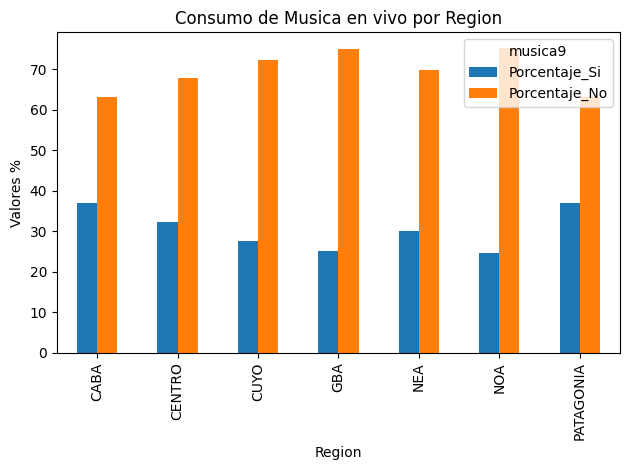

In [89]:
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
consumo_musica_vivo_region[[ 'Porcentaje_Si','Porcentaje_No']].plot(kind='bar')
plt.title('Consumo de Musica en vivo por Region')
plt.xlabel('Region')
plt.ylabel('Valores %')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

### Correlacion del Consumo de Musica en vivo con otras variables

In [90]:

from scipy.stats import chi2_contingency # Para la prueba de Chi-cuadrado

# Variable de consumo que nos interesa
variable_consumo = 'musica9'

# Lista de variables con las que queremos correlacionar el consumo
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

# Función para calcular la V de Cramer
def cramers_v(confusion_matrix):
    """
    Calcula el coeficiente V de Cramer para una tabla de contingencia.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Ajuste para evitar división por cero o resultados mayores a 1
    v = np.sqrt(phi2 / min((k-1), (r-1)))
    return v

print(f"--- Análisis de Asociación con '{variable_consumo}' ---")
print("-" * 50)

# DataFrame para almacenar los resultados
resultados_asociacion = pd.DataFrame(columns=['Variable', 'Chi2_Statistic', 'P_Value', 'Cramers_V', 'Asociacion_Significativa'])

for var in variables_a_correlacionar:
    # 1. Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[var], df[variable_consumo])

    # 2. Realizar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Calcular la V de Cramer
    v_cramer = cramers_v(contingency_table)

    # Evaluar la significancia estadística (comúnmente p < 0.05)
    significativo = "Sí" if p_value < 0.05 else "No"

    # Imprimir resultados
    print(f"\nAsociación entre '{variable_consumo}' y '{var.replace('_', ' ').title()}':")
    print(f"  - Chi-cuadrado (estadístico): {chi2_stat:.2f}")
    print(f"  - Valor P: {p_value:.3f} (Si P < 0.05, la asociación es significativa)")
    print(f"  - V de Cramer: {v_cramer:.3f}")
    print(f"  - Asociación estadísticamente significativa: {significativo}")

    # Guardar en el DataFrame de resultados
    resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{
        'Variable': var.replace('_', ' ').title(),
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Cramers_V': v_cramer,
        'Asociacion_Significativa': significativo
    }])], ignore_index=True)

print("\n" + "="*60)
print("Resumen de la Asociación con el Consumo de Musica en vivo:")
print("="*60)
print(resultados_asociacion.to_string(index=False))

print("\nInterpretación de la V de Cramer:")
print("  - V de Cramer ≈ 0: No hay asociación o es muy débil.")
print("  - V de Cramer ≈ 0.1: Asociación débil.")
print("  - V de Cramer ≈ 0.3: Asociación moderada.")
print("  - V de Cramer ≈ 0.5: Asociación fuerte.")
print("  - V de Cramer ≈ 1.0: Asociación muy fuerte (perfecta).")

--- Análisis de Asociación con 'musica9' ---
--------------------------------------------------

Asociación entre 'musica9' y 'Grupos Edad':
  - Chi-cuadrado (estadístico): 177.31
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.229
  - Asociación estadísticamente significativa: Sí

Asociación entre 'musica9' y 'Soc13.1':
  - Chi-cuadrado (estadístico): 151.70
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.212
  - Asociación estadísticamente significativa: Sí

Asociación entre 'musica9' y 'Region':
  - Chi-cuadrado (estadístico): 34.53
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.101
  - Asociación estadísticamente significativa: Sí

Asociación entre 'musica9' y 'Niv Socioe':
  - Chi-cuadrado (estadístico): 83.50
  - Valor P: 0.000 (Si P < 0.05, la asociación es significativa)
  - V de Cramer: 0.157
  - Asociación estadísticamente significativa: Sí

Resumen de la Asociación co

/tmp/ipython-input-2960621682.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_asociacion = pd.concat([resultados_asociacion, pd.DataFrame([{


/tmp/ipython-input-1668800982.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')


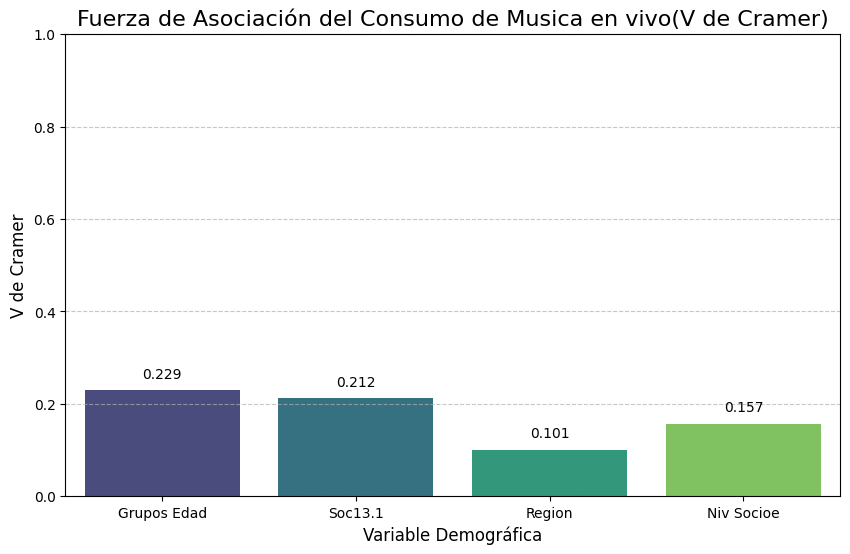

In [91]:
# Asegúrate de que 'musica9' sea categórica, por si acaso
df['musica9'] = df['musica9'].astype('category')

# Lista de variables con las que queremos correlacionar/asociar 'musica9'
variables_a_correlacionar = ['grupos_edad', 'soc13.1', 'region','niv_socioe']

resultados_asociacion = []

for var in variables_a_correlacionar:
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var], df['musica9'])

    # Calcular Chi-cuadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

    # Calcular V de Cramer
    n = tabla_contingencia.sum().sum()
    min_dim = min(tabla_contingencia.shape) - 1
    # Evitar división por cero si min_dim es 0 (ej. tabla 1xN o Nx1)
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0

    resultados_asociacion.append({
        'Variable': var.replace("_", " ").title(), # Formatear el nombre para el gráfico
        'V_Cramer': v_cramer,
        'P-valor': p_valor # Incluimos el p-valor también para referencia
    })

# Convertir los resultados a un DataFrame para facilitar el trazado
df_resultados = pd.DataFrame(resultados_asociacion)

# --- Creación del Gráfico ---
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura según sea necesario

# Usamos Seaborn para crear el gráfico de barras.
# Seaborn es excelente para gráficos estadísticos y se integra bien con Pandas.
sns.barplot(x='Variable', y='V_Cramer', data=df_resultados, palette='viridis')

# Añadir los valores de V de Cramer sobre cada barra para mayor precisión
for index, row in df_resultados.iterrows():
    plt.text(index, row['V_Cramer'] + 0.02, f"{row['V_Cramer']:.3f}",
             color='black', ha="center", va='bottom', fontsize=10)

    # Opcional: Añadir un indicador si el p-valor no es significativo (por ejemplo, con un asterisco)
    # Aquí decidimos no añadirlo para simplificar el gráfico, ya que el enfoque es V de Cramer.
    # Pero podrías hacerlo si lo necesitas:
    # if row['P-valor'] >= 0.05:
    #     plt.text(index, row['V_Cramer'] + 0.04, "*", color='red', ha="center", va='bottom', fontsize=12)


plt.title('Fuerza de Asociación del Consumo de Musica en vivo(V de Cramer)', fontsize=16)
plt.xlabel('Variable Demográfica', fontsize=12)
plt.ylabel('V de Cramer', fontsize=12)
plt.ylim(0, 1) # La V de Cramer siempre va de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.show()

###Razones de No Consumos de la Categoria Musica en vivo

####Segmentado por Rango Etario

****

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 68.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


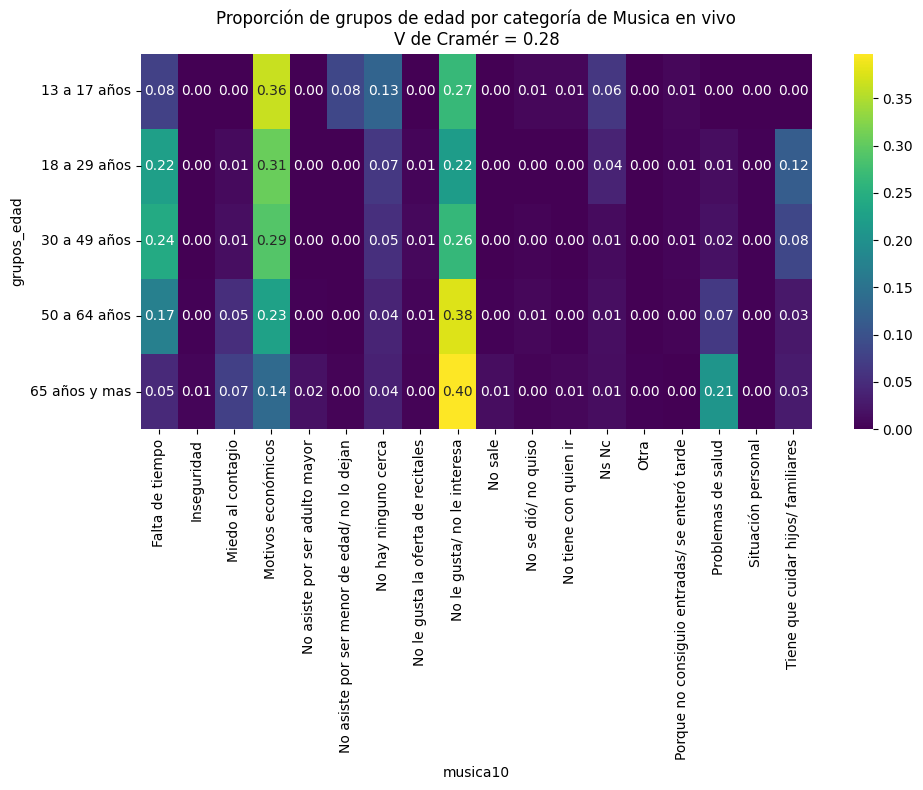

In [92]:
df['musica10'].value_counts()
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['grupos_edad'], df['musica10'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar los grupos de edad dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['grupos_edad'], df['musica10'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')

# Agregar el título con el valor de V de Cramér
plt.title(f"Proporción de grupos de edad por categoría de Musica en vivo\nV de Cramér = {cramers_v:.2f}")

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Mostrar la gráfica
plt.xlabel('musica10')
plt.ylabel('grupos_edad')
plt.tight_layout()
plt.show()


Son 2 las principales razones para no cosumir musica en vivo, la falta de interes/gusto y los motivos economicos. con una relacion interesante entre ellas, a medida que aumenta la edad, disminuyen los motivos economicos y aumentan las razones de Interes y Gusto.
En este analisi tambien aparece destacado como razon de no cosumo la Falta de tiempo , principalmente entre los rangos economicamente activos.


####Segmentado por Region

/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 102.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


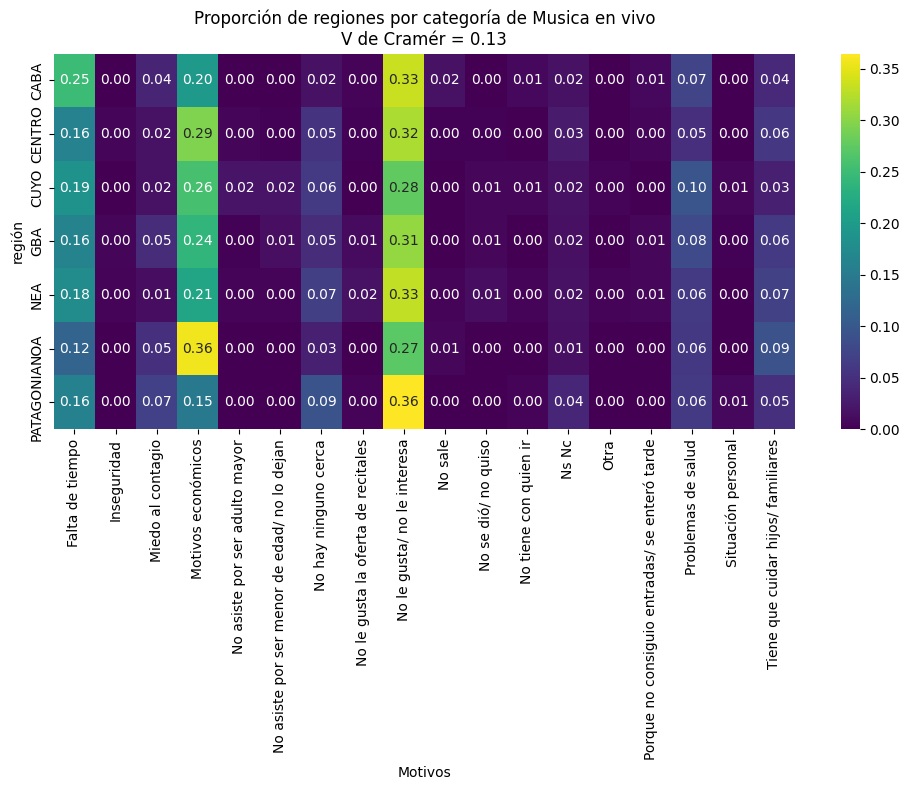

In [93]:
# Calcular el valor de V de Cramér
crosstab, res = rp.crosstab(df['region'], df['musica10'], test='chi-square')
cramers_v = res.loc[2, 'results']  # Extraer el valor de V de Cramér

# Crear una tabla cruzada para contar las regiones dentro de cada categoría de 'teatro2'
cross_tab = pd.crosstab(df['region'], df['musica10'])

# Normalizar la tabla cruzada para obtener proporciones por fila
cross_tab_prop = cross_tab.apply(lambda x: x / x.sum(), axis=1)  # Proporciones por fila

# Graficar el mapa de calor con V de Cramér en el título
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_prop, annot=True, cmap='viridis', fmt='.2f')  # fmt='.2f' para 2 decimales

# Agregar título con el valor de V de Cramér
plt.title(f"Proporción de regiones por categoría de Musica en vivo\nV de Cramér = {cramers_v:.2f}")

# Mostrar la gráfica
plt.xlabel('Motivos')
plt.ylabel('región')
plt.tight_layout()
plt.show()


Podemos ver como sigue siendo preponderante las razones de Interes/Gusto a la hora de no consumir. En algunas Regiones como el NOA las razones economicas superan a las anteriores como el motivo principal.
El factor Falta de tiempo aparece en todas las regiones con importancia pero nuevamente la region CABA es la que aparece mas afectada.


# Consumos agrupados

In [94]:
consumos_agrupados= ['tv1', 'tv9', 'teatro1', 'musica9']
for col in consumos_agrupados:
    print(f"Cross-tabulation of 'grupos_edad' and '{col}':")
    consumo_agrupado_edad = pd.crosstab(df['grupos_edad'], df[col])
    print(consumo_agrupado_edad)

Cross-tabulation of 'grupos_edad' and 'tv1':
tv1             NO    SI
grupos_edad             
13 a 17 años    25   178
18 a 29 años   120   582
30 a 49 años   132  1049
50 a 64 años    48   643
65 años y mas   22   581
Cross-tabulation of 'grupos_edad' and 'tv9':
tv9             NO   SI
grupos_edad            
13 a 17 años    42  161
18 a 29 años   134  568
30 a 49 años   344  837
50 a 64 años   343  348
65 años y mas  395  208
Cross-tabulation of 'grupos_edad' and 'teatro1':
teatro1         NO   SI
grupos_edad            
13 a 17 años   164   39
18 a 29 años   604   98
30 a 49 años   954  227
50 a 64 años   564  127
65 años y mas  521   82
Cross-tabulation of 'grupos_edad' and 'musica9':
musica9         NO   SI
grupos_edad            
13 a 17 años   143   60
18 a 29 años   399  303
30 a 49 años   756  425
50 a 64 años   541  150
65 años y mas  521   82


##Consumos por Rango etario

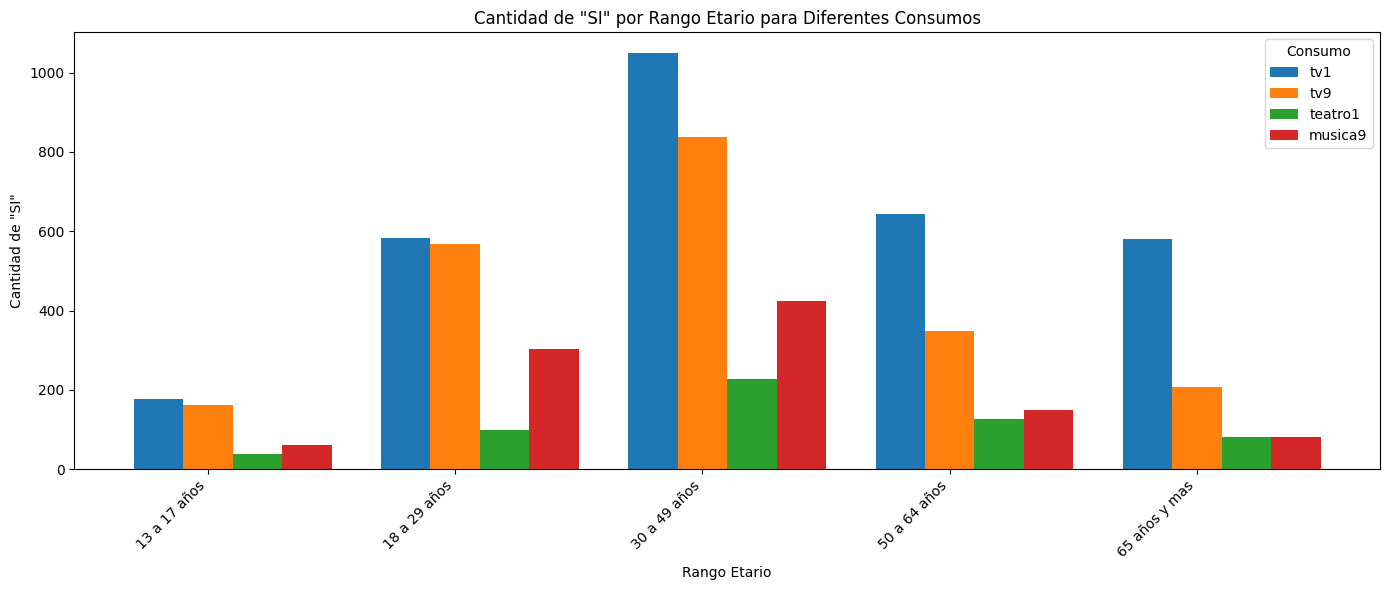

In [95]:
consumos_agrupados = ['tv1', 'tv9', 'teatro1', 'musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
grupos_edad_orden = sorted(df['grupos_edad'].unique())

plt.figure(figsize=(14, 6))
bar_width = 0.2
x = range(len(grupos_edad_orden))

for i, col in enumerate(consumos_agrupados_renombrado):
    consumo_agrupado_edad = pd.crosstab(df['grupos_edad'], df[col])
    if 'SI' in consumo_agrupado_edad.columns:  # Buscar la columna con la cadena 'SI'
        valores_si = consumo_agrupado_edad.reindex(grupos_edad_orden)['SI'].fillna(0)
        plt.bar([pos + i * bar_width for pos in x], valores_si, bar_width, label=col)

plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de "SI"')
plt.title('Cantidad de "SI" por Rango Etario para Diferentes Consumos')
plt.xticks([pos + bar_width for pos in x], grupos_edad_orden, rotation=45, ha='right')
plt.legend(title='Consumo')
plt.tight_layout()
plt.show()

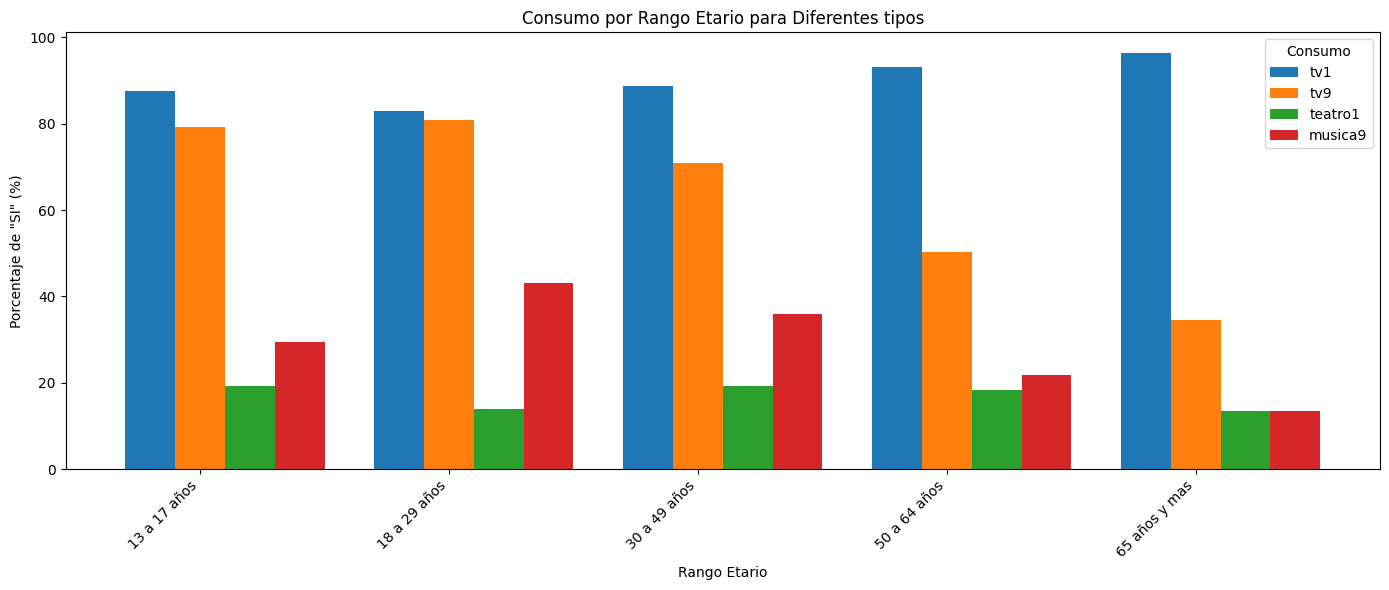

In [96]:
consumos_agrupados = ['tv1', 'tv9', 'teatro1','musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
grupos_edad_orden = sorted(df['grupos_edad'].unique())

plt.figure(figsize=(14, 6))
bar_width = 0.20
x = range(len(grupos_edad_orden))

for i, col in enumerate(consumos_agrupados_renombrado):
    consumo_agrupado_edad = pd.crosstab(df['grupos_edad'], df[col])

    porcentajes_si = pd.Series([0.0] * len(grupos_edad_orden), index=grupos_edad_orden)

    if 'SI' in consumo_agrupado_edad.columns:
        total_por_grupo = consumo_agrupado_edad.sum(axis=1)
        porcentajes_si = (consumo_agrupado_edad.reindex(grupos_edad_orden)['SI'].fillna(0) / total_por_grupo) * 100

    plt.bar([pos + i * bar_width for pos in x], porcentajes_si, bar_width, label=col)

plt.xlabel('Rango Etario')
plt.ylabel('Porcentaje de "SI" (%)')
plt.title('Consumo por Rango Etario para Diferentes tipos')
plt.xticks([pos + bar_width for pos in x], grupos_edad_orden, rotation=45, ha='right')
plt.legend(title='Consumo')
plt.tight_layout()
plt.show()

##Consumo por Region

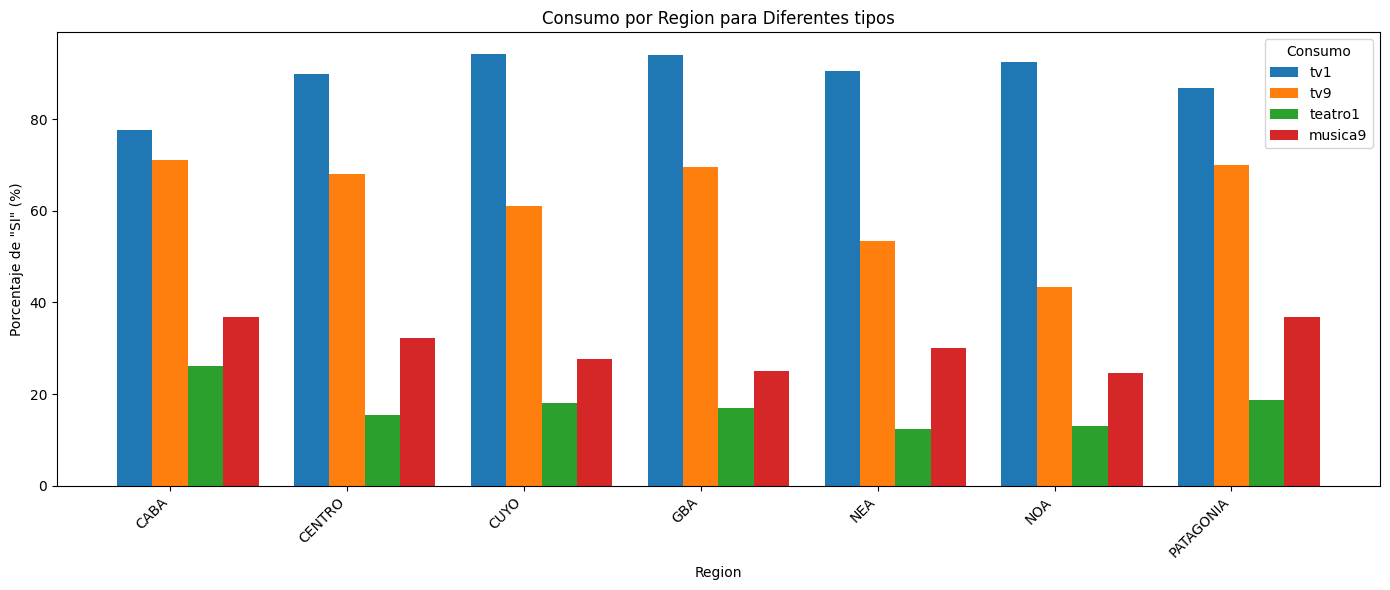

In [97]:
consumos_agrupados = ['tv1', 'tv9', 'teatro1','musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
region_orden = sorted(df['region'].unique())

plt.figure(figsize=(14, 6))
bar_width = 0.20
x = range(len(region_orden))

for i, col in enumerate(consumos_agrupados_renombrado):
    consumo_agrupado_region = pd.crosstab(df['region'], df[col])

    porcentajes_si = pd.Series([0.0] * len(region_orden), index=region_orden)

    if 'SI' in consumo_agrupado_region.columns:
        total_por_grupo = consumo_agrupado_region.sum(axis=1)
        porcentajes_si = (consumo_agrupado_region.reindex(region_orden)['SI'].fillna(0) / total_por_grupo) * 100

    plt.bar([pos + i * bar_width for pos in x], porcentajes_si, bar_width, label=col)

plt.xlabel('Region')
plt.ylabel('Porcentaje de "SI" (%)')
plt.title('Consumo por Region para Diferentes tipos')
plt.xticks([pos + bar_width for pos in x], region_orden, rotation=45, ha='right')
plt.legend(title='Consumo')
plt.tight_layout()
plt.show()

##Consumos por Nivel de Estudios

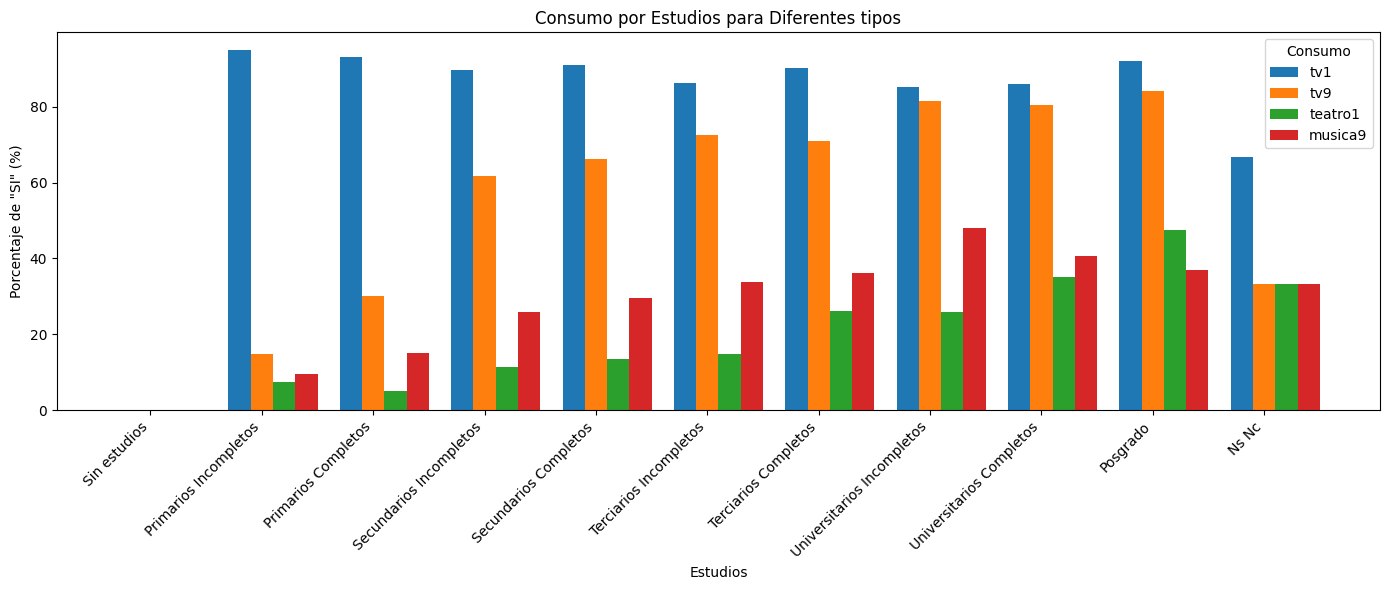

In [98]:
consumos_agrupados = ['tv1', 'tv9', 'teatro1','musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
orden_estudios = [
    'Sin estudios',
    'Primarios Incompletos',
    'Primarios Completos',
    'Secundarios Incompletos',
    'Secundarios Completos',
    'Terciarios Incompletos',
    'Terciarios Completos',
    'Universitarios Incompletos',
    'Universitarios Completos',
    'Posgrado',
    'Ns Nc'
]

plt.figure(figsize=(14, 6))
bar_width = 0.20
x = range(len(orden_estudios))

for i, col in enumerate(consumos_agrupados_renombrado):
    consumo_agrupado_estudios = pd.crosstab(df['soc13.1'], df[col])

    porcentajes_si = pd.Series([0.0] * len(orden_estudios), index=orden_estudios)


    if 'SI' in consumo_agrupado_estudios.columns:
        total_por_grupo = consumo_agrupado_estudios.sum(axis=1)
        calculated_percentages = (consumo_agrupado_estudios['SI'] / total_por_grupo) * 100
        porcentajes_si = calculated_percentages.reindex(orden_estudios).fillna(0)
        #porcentajes_si = (consumo_agrupado_estudios.reindex(orden_estudios)['SI'].fillna(0) / total_por_grupo) * 100

    plt.bar([pos + i * bar_width for pos in x], porcentajes_si, bar_width, label=col)

plt.xlabel('Estudios')
plt.ylabel('Porcentaje de "SI" (%)')
plt.title('Consumo por Estudios para Diferentes tipos')
plt.xticks([pos + bar_width for pos in x], orden_estudios, rotation=45, ha='right')
plt.legend(title='Consumo')
plt.tight_layout()
plt.show()

##Consumos por Nivel Socioeconomico

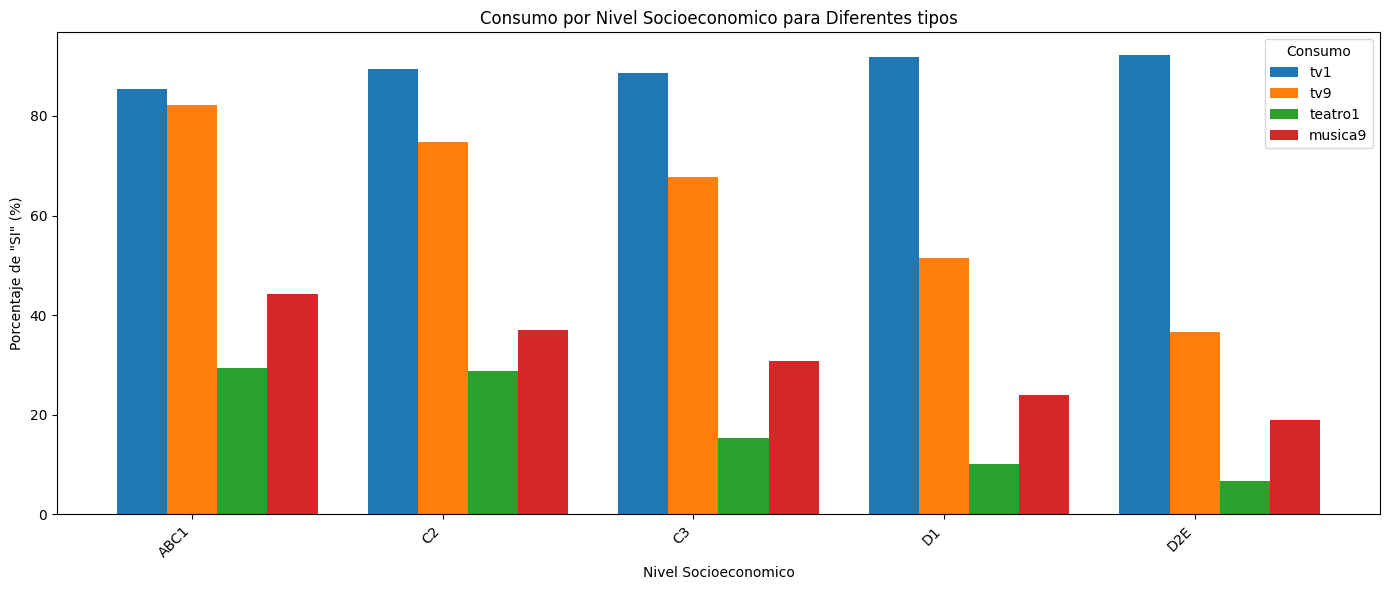

In [99]:
consumos_agrupados = ['tv1', 'tv9', 'teatro1','musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
niv_socioe_orden = sorted(df['niv_socioe'].unique())

plt.figure(figsize=(14, 6))
bar_width = 0.20
x = range(len(niv_socioe_orden))

for i, col in enumerate(consumos_agrupados_renombrado):
    consumo_agrupado_niv_socioe = pd.crosstab(df['niv_socioe'], df[col])

    porcentajes_si = pd.Series([0.0] * len(niv_socioe_orden), index=niv_socioe_orden)

    if 'SI' in consumo_agrupado_niv_socioe.columns:
        total_por_grupo = consumo_agrupado_niv_socioe.sum(axis=1)
        calculated_percentages = (consumo_agrupado_niv_socioe['SI'] / total_por_grupo) * 100
        porcentajes_si = calculated_percentages.reindex(niv_socioe_orden).fillna(0)

    plt.bar([pos + i * bar_width for pos in x], porcentajes_si, bar_width, label=col)

plt.xlabel('Nivel Socioeconomico')
plt.ylabel('Porcentaje de "SI" (%)')
plt.title('Consumo por Nivel Socioeconomico para Diferentes tipos')
plt.xticks([pos + bar_width for pos in x], niv_socioe_orden, rotation=45, ha='right')
plt.legend(title='Consumo')
plt.tight_layout()
plt.show()

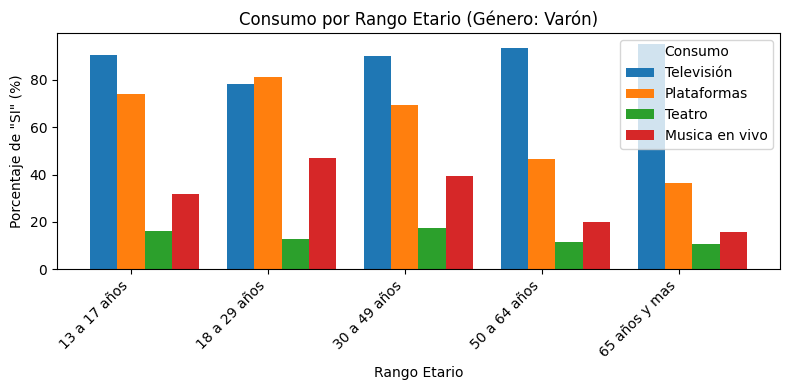

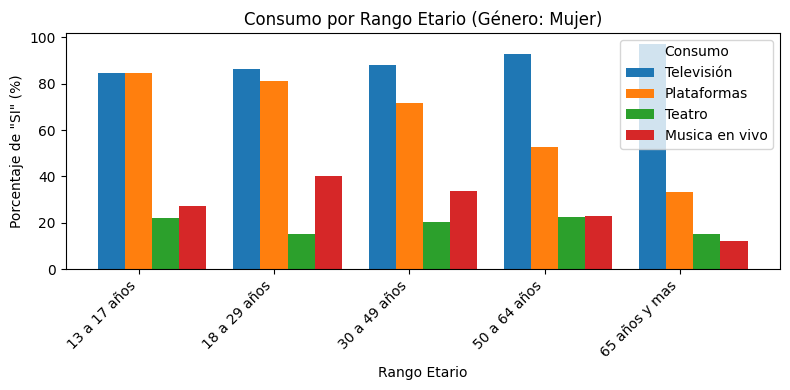

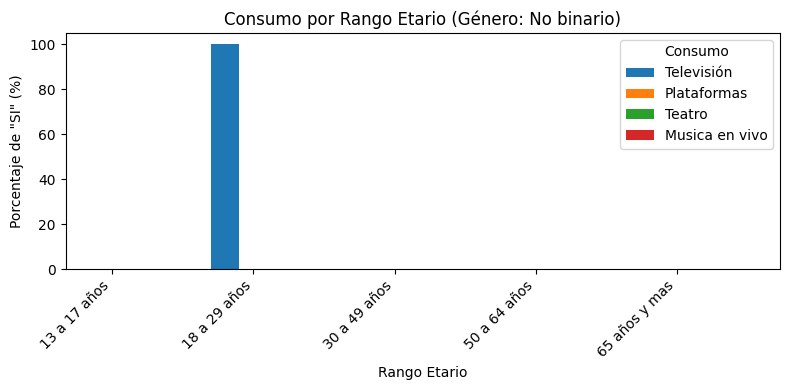

In [100]:
generos = df['genero'].unique()
consumos_agrupados_original = ['tv1', 'tv9', 'teatro1','musica9']
consumos_agrupados_renombrado = {'tv1': 'Televisión', 'tv9': 'Plataformas', 'teatro1': 'Teatro', 'musica9':'Musica en vivo'}
grupos_edad_orden = sorted(df['grupos_edad'].unique())
for genero in generos:
    df_filtrado = df[df['genero'] == genero]

    plt.figure(figsize=(8, 4))
    bar_width = 0.20
    x = range(len(grupos_edad_orden))

    for i, col_original in enumerate(consumos_agrupados_original):
        consumo_agrupado_edad = pd.crosstab(df_filtrado['grupos_edad'], df_filtrado[col_original])
        col_renombrado = consumos_agrupados_renombrado[col_original]

        porcentajes_si = pd.Series([0.0] * len(grupos_edad_orden), index=grupos_edad_orden)

        if 'SI' in consumo_agrupado_edad.columns:
            total_por_grupo = consumo_agrupado_edad.sum(axis=1)
            porcentajes_si = (consumo_agrupado_edad.reindex(grupos_edad_orden)['SI'].fillna(0) / total_por_grupo) * 100

        plt.bar([pos + i * bar_width for pos in x], porcentajes_si, bar_width, label=col_renombrado)

    plt.xlabel('Rango Etario')
    plt.ylabel('Porcentaje de "SI" (%)')
    plt.title(f'Consumo por Rango Etario (Género: {genero})')
    plt.xticks([pos + bar_width for pos in x], grupos_edad_orden, rotation=45, ha='right')
    plt.legend(title='Consumo')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-855255234.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  gender_colors = plt.cm.get_cmap('Set1', num_generos)


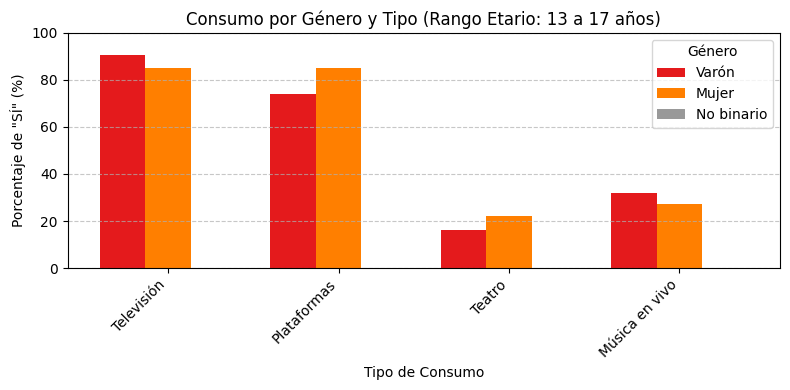

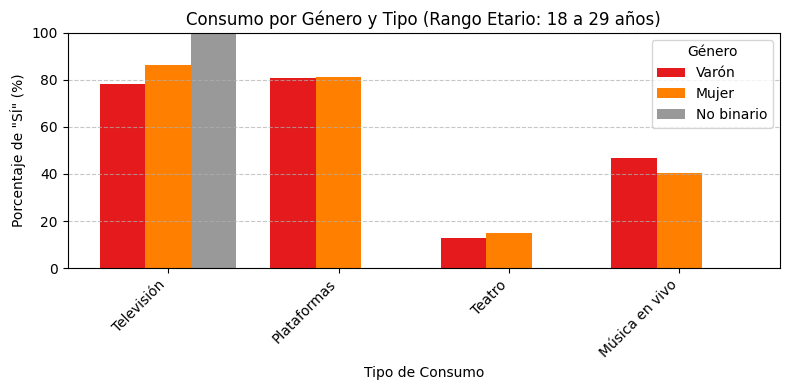

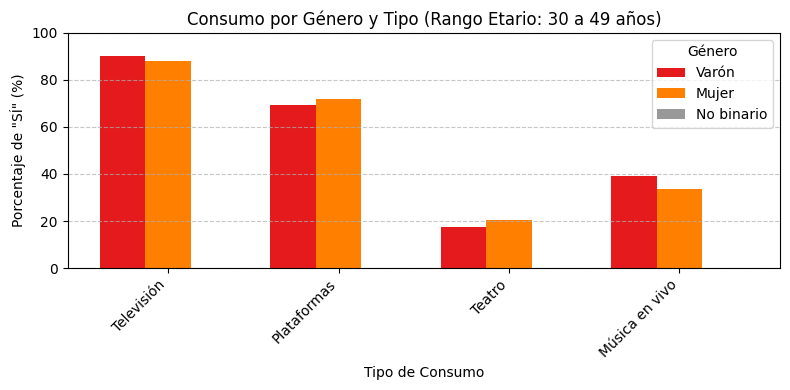

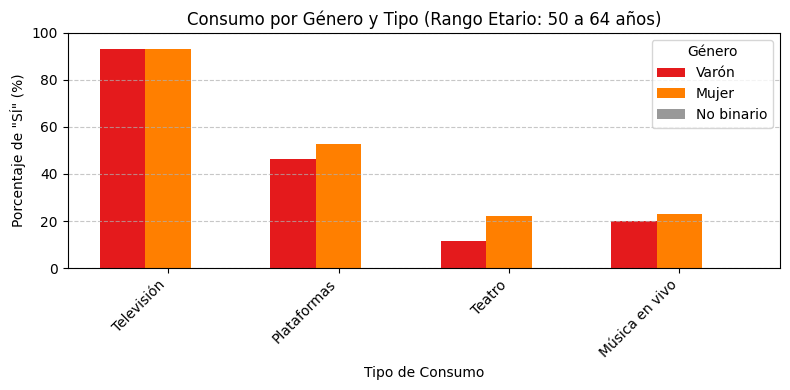

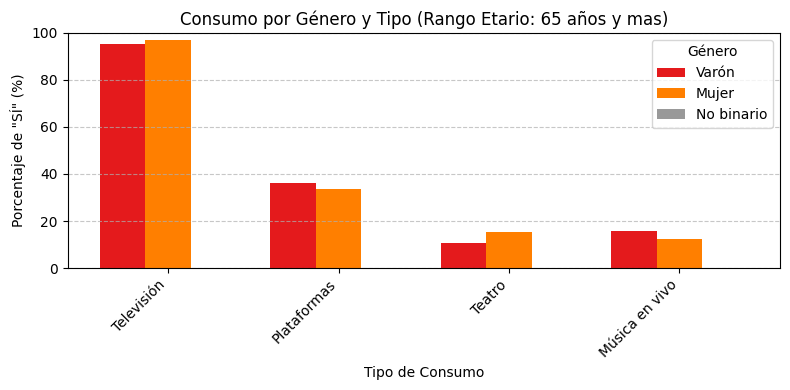

In [101]:
consumos_agrupados_original = ['tv1', 'tv9', 'teatro1', 'musica9']
consumos_agrupados_renombrado = {
    'tv1': 'Televisión',
    'tv9': 'Plataformas',
    'teatro1': 'Teatro',
    'musica9': 'Música en vivo'
}
grupos_edad_orden = sorted(df['grupos_edad'].unique())
generos_ordenados =df['genero'].unique() # Obtenemos los géneros únicos

num_consumos = len(consumos_agrupados_original)
num_generos = len(generos_ordenados)

# Ajustar el ancho de la barra para que quepan todos los géneros por tipo de consumo
bar_width_group = 0.8 / num_generos # Ancho para cada barra de género dentro de un grupo de consumo

# Usar un mapa de colores para los géneros para asegurar colores consistentes en todos los gráficos
gender_colors = plt.cm.get_cmap('Set1', num_generos)


for edad_actual in grupos_edad_orden:
    # Filtrar el DataFrame para el grupo de edad actual
    df_filtrado_edad = df[df['grupos_edad'] == edad_actual].copy()

    plt.figure(figsize=(8, 4)) # Crear una nueva figura para cada grupo de edad
    x_pos = np.arange(num_consumos) # Posiciones base para cada tipo de consumo

    # Diccionario para almacenar los handles de la leyenda y las etiquetas para evitar duplicados de géneros
    legend_handles = {}

    # Iterar a través de cada tipo de consumo
    for i, consumo_col in enumerate(consumos_agrupados_original):
        # Iterar a través de cada género para crear barras segmentadas
        for j, genero_val in enumerate(generos_ordenados):
            df_filtrado_genero = df_filtrado_edad[df_filtrado_edad['genero'] == genero_val]

            # Calcular el porcentaje de 'SI' para el consumo y género actuales
            conteo_si = df_filtrado_genero[consumo_col].value_counts().get('SI', 0)
            total_grupo = len(df_filtrado_genero)

            porcentaje_si = (conteo_si / total_grupo) * 100 if total_grupo > 0 else 0

            # Calcular el desplazamiento para cada barra de género dentro de un tipo de consumo
            # Esto centra las barras de género alrededor de la posición base del tipo de consumo
            offset = (j - (num_generos - 1) / 2) * bar_width_group

            # Trazar la barra para el género y tipo de consumo actuales
            bar = plt.bar(x_pos[i] + offset, porcentaje_si, bar_width_group,
                          color=gender_colors(j)) # Asignar color basado en el índice del género

            # Almacenar el handle para la leyenda, solo si este género no ha sido añadido todavía
            if genero_val not in legend_handles:
                legend_handles[genero_val] = bar

    plt.xlabel('Tipo de Consumo')
    plt.ylabel('Porcentaje de "SÍ" (%)')
    plt.title(f'Consumo por Género y Tipo (Rango Etario: {edad_actual})')

    # Establecer las etiquetas del eje x para que sean los tipos de consumo renombrados
    plt.xticks(x_pos, [consumos_agrupados_renombrado[c] for c in consumos_agrupados_original], rotation=45, ha='right')

    # Añadir la leyenda usando los handles y etiquetas recopilados
    plt.legend(handles=legend_handles.values(), labels=legend_handles.keys(), title='Género')

    plt.ylim(0, 100) # Asegurar que el eje y vaya de 0 a 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [102]:
df["soc13.1"].isna().sum()

np.int64(0)

In [103]:
df['grupos_edad'].value_counts()

,count
grupos_edad,
30 a 49 años,1181
18 a 29 años,702
50 a 64 años,691
65 años y mas,603
13 a 17 años,203


# **MODELO**

In [104]:
orden_edad = {
    "13 a 17 años": 1,
    "18 a 29 años": 2,
    "30 a 49 años": 3,
    "50 a 64 años": 4,
    "65 años y mas": 5
}
df["edad_ordinal"] = df["grupos_edad"].map(orden_edad)

In [105]:
df['edad_ordinal'].value_counts()

,count
edad_ordinal,
3,1181
2,702
4,691
5,603
1,203


In [106]:
television = {'SI': 1, 'NO': 0}
df['tv1'] = df['tv1'].map(television)
plataformas = {'SI': 1, 'NO': 0}
df['tv9'] = df['tv9'].map(plataformas)
teatro = {'SI': 1, 'NO': 0}
df['teatro1'] = df['teatro1'].map(teatro)
musica = {'SI': 1, 'NO': 0}
df['musica9'] = df['musica9'].map(musica)

In [107]:
nivel_socio_mapping = {
    'D2E': 0,
    'D1': 1,
    'C3': 2,
    'C2': 3,
    'ABC1': 4
}
df['niv_socioe'] = df['niv_socioe'].map(nivel_socio_mapping)

In [108]:
masculino = {'Masculino': 1, 'Femenino': 0}
df['genero'] = df['genero'].map(masculino)

In [109]:
region_mapping = {
    'CABA': 0,
    'CENTRO': 1,
    'PATAGONIA': 2,
    'NOA': 3,
    'NEA': 4,
    'CUYO': 5,
    'GBA': 6,

}
df['region'] = df['region'].map(region_mapping)



In [110]:
estudios_alcanzados = {
     'Sin estudios': 0,
    'Primarios Incompletos': 1,
    'Primarios Completos': 2,
    'Secundarios Incompletos': 3,
    'Secundarios Completos': 4,
    'Terciarios Incompletos': 5,
    'Terciarios Completos': 6,
    'Universitarios Incompletos': 7,
    'Universitarios Completos': 8,
    'Posgrado': 9,
    'Ns Nc': 10,
}

df['soc13.1'] = df['soc13.1'].map(estudios_alcanzados)




## **Modelo para analizar el consumo de teatro**


El modelo predijo con buena performance a quienes no consumen Teatro, que es una de las variables en la que nos estamos enfocando. El peso del nivel educativo y la región influye notablente sobre el consumo cultural, en este caso el teatro. A Mayor nivel educativo, mayor consumo de teatro. Y en el caso de la región la posibilidad de tener teatros cerca. Tambien juega un papel importante el rango etario.

###Random Forest

In [111]:
#importar sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Usamos LabelEncoder para género, región y nivel educativo
label_encoders = {}
label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
    label_encoders[col] = LabelEncoder().fit(df[col])


# -------- 3. Definir variables X e y --------
X = df[["edad_ordinal", "genero", "region", "soc13.1","niv_socioe", "tv1", "tv9"]]
y = df["teatro1"]

# -------- 4. Dividir en entrenamiento y prueba --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- 5. Entrenar modelo Random Forest --------
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, min_samples_leaf=10, max_depth=10)
clf.fit(X_train, y_train)

# -------- 6. Evaluar modelo --------
# -------- 6.1. Predecir probabilidades --------
y_proba = clf.predict_proba(X_test)[:, 1]

# Ajustar el umbral
umbral = 0.3
y_pred_umbral = (y_proba >= umbral).astype(int)

# -------- 6.2. Evaluar con nuevo umbral --------
print("Matriz de Confusión con umbral =", umbral)
print(confusion_matrix(y_test, y_pred_umbral))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_umbral))


# -------- 7. Importancia de las variables --------
importancia = pd.Series(clf.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))

Matriz de Confusión con umbral = 0.3
[[190 380]
 [ 12  94]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.33      0.49       570
           1       0.20      0.89      0.32       106

    accuracy                           0.42       676
   macro avg       0.57      0.61      0.41       676
weighted avg       0.82      0.42      0.47       676


Importancia de las variables:
soc13.1         0.327288
niv_socioe      0.212684
region          0.173988
edad_ordinal    0.133287
tv9             0.132514
tv1             0.020239
genero          0.000000
dtype: float64


**Prediccion de un nuevo individuo**

Podemos ver en el primer caso como predictivamente el modelo evalua un perfil teniendo en cuenta las variables antes mencionadas que un Inviduo con las siguientes caracteristicas como lo son el rango etario de 30 a 49, masculino, que reside en CABA, con el secundario completo, un nivel socioeconomico alto que no mira Television pero si consume plataformas, puede llegar a tener un mayor consumo de teatro.

In [112]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'tv1': 0, #  'NO'
  'tv9': 1 #  'SI'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = clf.predict(nuevo_perfil_df)
predicted_proba = clf.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de teatro: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'tv1': 0, 'tv9': 1} tiene probabilidad de consumo de teatro: SI
Probabilidad de 'SI': 0.7108
Probabilidad de 'NO': 0.2892


En este caso un indiduo de 50 a 64 años, femenino, estudios universitarios completos, nivel socioeconomico muy alto, que mira television pero no plataformas, tiene una tendencia a consumir teatro

In [113]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 4,
  'genero': 0, # 'Femenino'
  'region': 4, # 'CENTRO'
  'soc13.1': 8, # 'Universitarios completos'
  'niv_socioe': 4, # 'ABC1'
  'tv1': 1, #  'SI'
  'tv9': 0 #  'NO'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = clf.predict(nuevo_perfil_df)
predicted_proba = clf.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de teatro: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 4, 'genero': 0, 'region': 4, 'soc13.1': 8, 'niv_socioe': 4, 'tv1': 1, 'tv9': 0} tiene probabilidad de consumo de teatro: SI
Probabilidad de 'SI': 0.7234
Probabilidad de 'NO': 0.2766




---



---



###Gradient Boosting

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 2. Definir X e y
X = df[["edad_ordinal", "genero", "region", "soc13.1", "niv_socioe", "tv1", "tv9"]]
y = df["teatro1"]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Balancear con SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. Entrenar modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
gb_model.fit(X_resampled, y_resampled)

# 6. Predecir y evaluar
y_pred = gb_model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Importancia de las variables
importancia = pd.Series(gb_model.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))


Matriz de Confusión:
[[342 228]
 [ 37  69]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       570
           1       0.23      0.65      0.34       106

    accuracy                           0.61       676
   macro avg       0.57      0.63      0.53       676
weighted avg       0.80      0.61      0.66       676


Importancia de las variables:
soc13.1         0.417161
region          0.207948
edad_ordinal    0.134518
niv_socioe      0.119024
tv1             0.065041
tv9             0.056309
genero          0.000000
dtype: float64


In [115]:
print("\n--- Predicción para un Nuevo Individuo segun el gradient Boosting ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'tv1': 0, #  'NO'
  'tv9': 1 #  'SI'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = gb_model.predict(nuevo_perfil_df)
predicted_proba = gb_model.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de teatro: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo segun el gradient Boosting ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'tv1': 0, 'tv9': 1} tiene probabilidad de consumo de teatro: SI
Probabilidad de 'SI': 0.8249
Probabilidad de 'NO': 0.1751


## **Modelo para analizar el consumo de TV**

Podemos determinar tambien, que la región, el rango etario y el nivel educativo influyen notablemente en el consumo de TV. Como vimos en analisis anteriores podemos determinar que a mayor nivel educativo menor es el consumo de televisión

###Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# -------- 2. Codificación de variables categóricas --------
# Usamos LabelEncoder para género, región y nivel educativo
label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# -------- 3. Definir variables X e y --------
X = df[["edad_ordinal", "genero", "region", "soc13.1", "niv_socioe", "teatro1"]]
y = df["tv1"]

# -------- 4. Dividir en entrenamiento y prueba --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- 5. Entrenar modelo Random Forest --------
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, min_samples_leaf=10, max_depth=10)
clf.fit(X_train, y_train)

# -------- 6. Evaluar modelo --------
y_pred = clf.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# -------- 7. Importancia de las variables --------
importancia = pd.Series(clf.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))

Matriz de Confusión:
[[ 36  35]
 [136 469]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.21      0.51      0.30        71
           1       0.93      0.78      0.85       605

    accuracy                           0.75       676
   macro avg       0.57      0.64      0.57       676
weighted avg       0.85      0.75      0.79       676


Importancia de las variables:
region          0.328267
edad_ordinal    0.290213
soc13.1         0.196577
niv_socioe      0.134438
teatro1         0.050504
genero          0.000000
dtype: float64


**Modelo de predicción del consumo de Televisión**

Un individuo con estas caracteristicas tiene menos posibilidades de consumir TV

In [117]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'teatro1': 1, # SI
  'tv9': 1 #  'SI'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = clf.predict(nuevo_perfil_df)
predicted_proba = clf.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de televisión: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'teatro1': 1, 'tv9': 1} tiene probabilidad de consumo de televisión: NO
Probabilidad de 'SI': 0.2894
Probabilidad de 'NO': 0.7106


###Gradient Boosting

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 2. Definir X e y
X = df[["edad_ordinal", "genero", "region", "soc13.1", "niv_socioe", "teatro1"]]
y = df["tv1"]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Balancear con SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. Entrenar modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
gb_model.fit(X_resampled, y_resampled)

# 6. Predecir y evaluar
y_pred = gb_model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Importancia de las variables
importancia = pd.Series(gb_model.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))


Matriz de Confusión:
[[ 37  34]
 [180 425]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.17      0.52      0.26        71
           1       0.93      0.70      0.80       605

    accuracy                           0.68       676
   macro avg       0.55      0.61      0.53       676
weighted avg       0.85      0.68      0.74       676


Importancia de las variables:
edad_ordinal    0.382407
region          0.308941
soc13.1         0.169135
niv_socioe      0.088000
teatro1         0.051517
genero          0.000000
dtype: float64


Modelo de prediccion segun el Gradient Boosting

In [119]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'teatro1': 0, # SI
  'tv9': 1 #  'SI'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = gb_model.predict(nuevo_perfil_df)
predicted_proba = gb_model.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de televisión: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'teatro1': 0, 'tv9': 1} tiene probabilidad de consumo de televisión: NO
Probabilidad de 'SI': 0.2358
Probabilidad de 'NO': 0.7642


# **Modelo para analizar el consumo de plataformas**

Podemos ver como ambos modelos le dan mas peso al rango etario. Puede estar asociado a generaciones más jovenes y el manejor de la tecnología

###Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# -------- 2. Codificación de variables categóricas --------
# Usamos LabelEncoder para género, región y nivel educativo
label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# -------- 3. Definir variables X e y --------
X = df[["edad_ordinal", "genero", "region", "soc13.1", "niv_socioe", "tv1", "teatro1"]]
y = df["tv9"]

# -------- 4. Dividir en entrenamiento y prueba --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- 5. Entrenar modelo Random Forest --------
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, min_samples_leaf=10, max_depth=10)
clf.fit(X_train, y_train)

# -------- 6. Evaluar modelo --------
y_pred = clf.predict(X_test)

print("https://colab.research.google.com/drive/1kxdFxtMzkNnHseJCjtPyHehyM4YWxbAk#scrollTo=Modelo_para_analizar_el_consumo_de_plataformasatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# -------- 7. Importancia de las variables --------
importancia = pd.Series(clf.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))

https://colab.research.google.com/drive/1kxdFxtMzkNnHseJCjtPyHehyM4YWxbAk#scrollTo=Modelo_para_analizar_el_consumo_de_plataformasatriz de Confusión:
[[173  79]
 [121 303]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       252
           1       0.79      0.71      0.75       424

    accuracy                           0.70       676
   macro avg       0.69      0.70      0.69       676
weighted avg       0.72      0.70      0.71       676


Importancia de las variables:
edad_ordinal    0.378984
soc13.1         0.247095
niv_socioe      0.154905
region          0.150440
teatro1         0.056005
tv1             0.012572
genero          0.000000
dtype: float64


**Modelo predictivo para el consumo de plataformas**

Ambos modelos predicen el mismo consumo de plataformas para el perfil descripto

In [121]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'tv1': 0,
  'teatro1': 1, # SI
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = clf.predict(nuevo_perfil_df)
predicted_proba = clf.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de Plataformas: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'tv1': 0, 'teatro1': 1} tiene probabilidad de consumo de Plataformas: SI
Probabilidad de 'SI': 0.7848
Probabilidad de 'NO': 0.2152


###Gradient Boosting


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 2. Definir X e y
X = df[["edad_ordinal", "genero", "region", "soc13.1","tv1", "niv_socioe", "teatro1"]]
y = df["tv9"]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Balancear con SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. Entrenar modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
gb_model.fit(X_resampled, y_resampled)

# 6. Predecir y evaluar
y_pred = gb_model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Importancia de las variables
importancia = pd.Series(gb_model.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))


Matriz de Confusión:
[[167  85]
 [128 296]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       252
           1       0.78      0.70      0.74       424

    accuracy                           0.68       676
   macro avg       0.67      0.68      0.67       676
weighted avg       0.70      0.68      0.69       676


Importancia de las variables:
edad_ordinal    0.347176
soc13.1         0.243606
region          0.146841
niv_socioe      0.144079
teatro1         0.077554
tv1             0.040744
genero          0.000000
dtype: float64


Modelo de prediccion pero con el Gradient Boosting

In [123]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'teatro1': 0, # SI
  'tv1': 1 #  'SI'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = gb_model.predict(nuevo_perfil_df)
predicted_proba = gb_model.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de televisión: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'teatro1': 0, 'tv1': 1} tiene probabilidad de consumo de televisión: SI
Probabilidad de 'SI': 0.7389
Probabilidad de 'NO': 0.2611


# **Modelo para analizar el consumo de musica en vivo**

###Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# -------- 2. Codificación de variables categóricas --------
# Usamos LabelEncoder para género, región y nivel educativo
label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# -------- 3. Definir variables X e y --------
X = df[["edad_ordinal", "genero", "region", "soc13.1", "niv_socioe", "teatro1",]]
y = df["musica9"]

# -------- 4. Dividir en entrenamiento y prueba --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- 5. Entrenar modelo Random Forest --------
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, min_samples_leaf=10, max_depth=10)
clf.fit(X_train, y_train)

# -------- 6. Evaluar modelo --------
y_pred = clf.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# -------- 7. Importancia de las variables --------
importancia = pd.Series(clf.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))

Matriz de Confusión:
[[320 151]
 [ 81 124]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       471
           1       0.45      0.60      0.52       205

    accuracy                           0.66       676
   macro avg       0.62      0.64      0.63       676
weighted avg       0.69      0.66      0.67       676


Importancia de las variables:
edad_ordinal    0.315128
soc13.1         0.213469
teatro1         0.173349
region          0.173058
niv_socioe      0.124996
genero          0.000000
dtype: float64


**Modelo de predicción de Musica en vivo**

In [125]:
print("\n--- Predicción para un Nuevo Individuo ---")


new_individual_data_raw = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'niv_socioe': 3, # 'C2'
  'tv1': 0,
  'teatro1': 1, # SI
}

new_individual_df = pd.DataFrame([new_individual_data_raw])

# Ensure the same order of columns as the training data
new_individual_df = new_individual_df[X_train.columns]

# Predicción
predicted_consumption = clf.predict(new_individual_df)
predicted_proba = clf.predict_proba(new_individual_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {new_individual_data_raw} tiene probabilidad de consumo de Música en vivo: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'niv_socioe': 3, 'tv1': 0, 'teatro1': 1} tiene probabilidad de consumo de Música en vivo: SI
Probabilidad de 'SI': 0.7574
Probabilidad de 'NO': 0.2426


###Gradient Boosting

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



label_cols = ["genero", "region", "soc13.1"]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 2. Definir X e y
X = df[["edad_ordinal", "genero", "region", "soc13.1", "tv1", "teatro1", "niv_socioe"]]
y = df["musica9"]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Balancear con SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. Entrenar modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
gb_model.fit(X_resampled, y_resampled)

# 6. Predecir y evaluar
y_pred = gb_model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Importancia de las variables
importancia = pd.Series(gb_model.feature_importances_, index=X.columns)
print("\nImportancia de las variables:")
print(importancia.sort_values(ascending=False))


Matriz de Confusión:
[[324 147]
 [ 86 119]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       471
           1       0.45      0.58      0.51       205

    accuracy                           0.66       676
   macro avg       0.62      0.63      0.62       676
weighted avg       0.69      0.66      0.67       676


Importancia de las variables:
edad_ordinal    0.438557
soc13.1         0.203471
region          0.140143
teatro1         0.125254
niv_socioe      0.083310
tv1             0.009265
genero          0.000000
dtype: float64


In [127]:
print("\n--- Predicción para un Nuevo Individuo ---")


nuevo_perfil = {
  'edad_ordinal': 3,
  'genero': 1, # 'Masculino'
  'region': 0, # 'CABA'
  'soc13.1': 4, # 'Secundario completo'
  'tv1': 0,
  'teatro1': 1,
  'niv_socioe': 3, # 'C2'
}

nuevo_perfil_df = pd.DataFrame([nuevo_perfil])

# Ensure the same order of columns as the training data
nuevo_perfil_df = nuevo_perfil_df[X_train.columns]

# Predicción
predicted_consumption = gb_model.predict(nuevo_perfil_df)
predicted_proba = gb_model.predict_proba(nuevo_perfil_df)

prediction_label = "SI" if predicted_consumption[0] == 1 else "NO"
proba_si = predicted_proba[0][1]
proba_no = predicted_proba[0][0]

print(f"\nEl individuo con el perfil {nuevo_perfil} tiene probabilidad de consumo de Música en vivo: {prediction_label}")
print(f"Probabilidad de 'SI': {proba_si:.4f}")
print(f"Probabilidad de 'NO': {proba_no:.4f}")


--- Predicción para un Nuevo Individuo ---

El individuo con el perfil {'edad_ordinal': 3, 'genero': 1, 'region': 0, 'soc13.1': 4, 'tv1': 0, 'teatro1': 1, 'niv_socioe': 3} tiene probabilidad de consumo de Música en vivo: SI
Probabilidad de 'SI': 0.8038
Probabilidad de 'NO': 0.1962
